# 1차 미니프로젝트 - 서울시 생활정보 기반 대중교통 수요 분석

## 문제 : 버스 정류장/노선 추가 필요 대상 지역(구 단위) 선정

In [27]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
import scipy.stats as spst

# 한글 폰트 적용
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')      

In [28]:
DATA_PATH = 'data/'

### 데이터 불러오기

In [29]:
bus = pd.read_csv(DATA_PATH + 'df_seoul_bus_station.csv')
move = pd.read_csv(DATA_PATH + 'df_seoul_moving.csv')
o_move = pd.read_csv(DATA_PATH + 'df_seoul_moving_default.csv')
people = pd.read_csv(DATA_PATH + 'df_seoul_people.csv')

In [30]:
move.rename(columns={'도착':'자치구'}, inplace=True)
standard = pd.merge(bus, move, on='자치구')
standard

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,강남구,499,91,8030483,7569213,128.767927,121.371512,23.284573,83.309306,12904380,46170267.40
1,강동구,369,21,2890053,2830506,99.161194,97.118065,26.108477,59.889404,9596980,22014206.89
2,강북구,413,67,4825181,4671783,133.020373,128.791504,24.282441,36.281421,8765160,13096395.71
3,강서구,566,49,4681083,4652828,88.119480,87.587591,25.496986,54.208682,10718780,22789004.72
4,관악구,466,86,7655819,7792476,154.753674,157.516040,23.842468,46.586809,10091730,19718658.80
5,광진구,269,41,2749448,2753411,118.352546,118.523137,22.779081,43.712430,9761770,18732568.44
6,구로구,486,79,4942197,4730992,119.235615,114.140076,23.480408,38.895596,9072360,15028480.32
7,금천구,345,58,3776658,3581930,123.098370,116.751304,24.394485,28.730583,7190250,8468310.47
8,노원구,514,57,4353295,4292724,88.476211,87.245168,24.497542,51.091182,10256190,21389936.36
9,도봉구,359,46,3304305,3211421,106.859356,103.855540,25.102882,35.099543,8053130,11260109.02


### 가설 수립
1. 지역 인구와 버스 이용자 사이에 관계성이 있다.

##### 정류장 설치
1) 정류장 수와 버스 이용자 수 사이의 관계성이 있다.
2) 정류장 수와 버스 이동 시간 사이에 관계성이 있다.
3) 정류장 수와 이동유형 사이에 관계성이 있다.
4) 정류장 수와 인구 사이에 관계성이 있다.

##### 노선 설치
1. 노선 수와 버스 이용자 수 사이에 관계성이 있다.
2. 노선 수와 버스 이동 시간 사이에 관계성이 있다.
3. 노선 수와 두 지역간의 이동인원 사이에 관계성이 있다.


### 이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [31]:
target = '자치구'
use = ['승차총승객수','하차총승객수','승차평균승객수','하차평균승객수', '평균 이동 시간(분)', '이동인구(합)', '총 이동 시간', '총 이동인구']

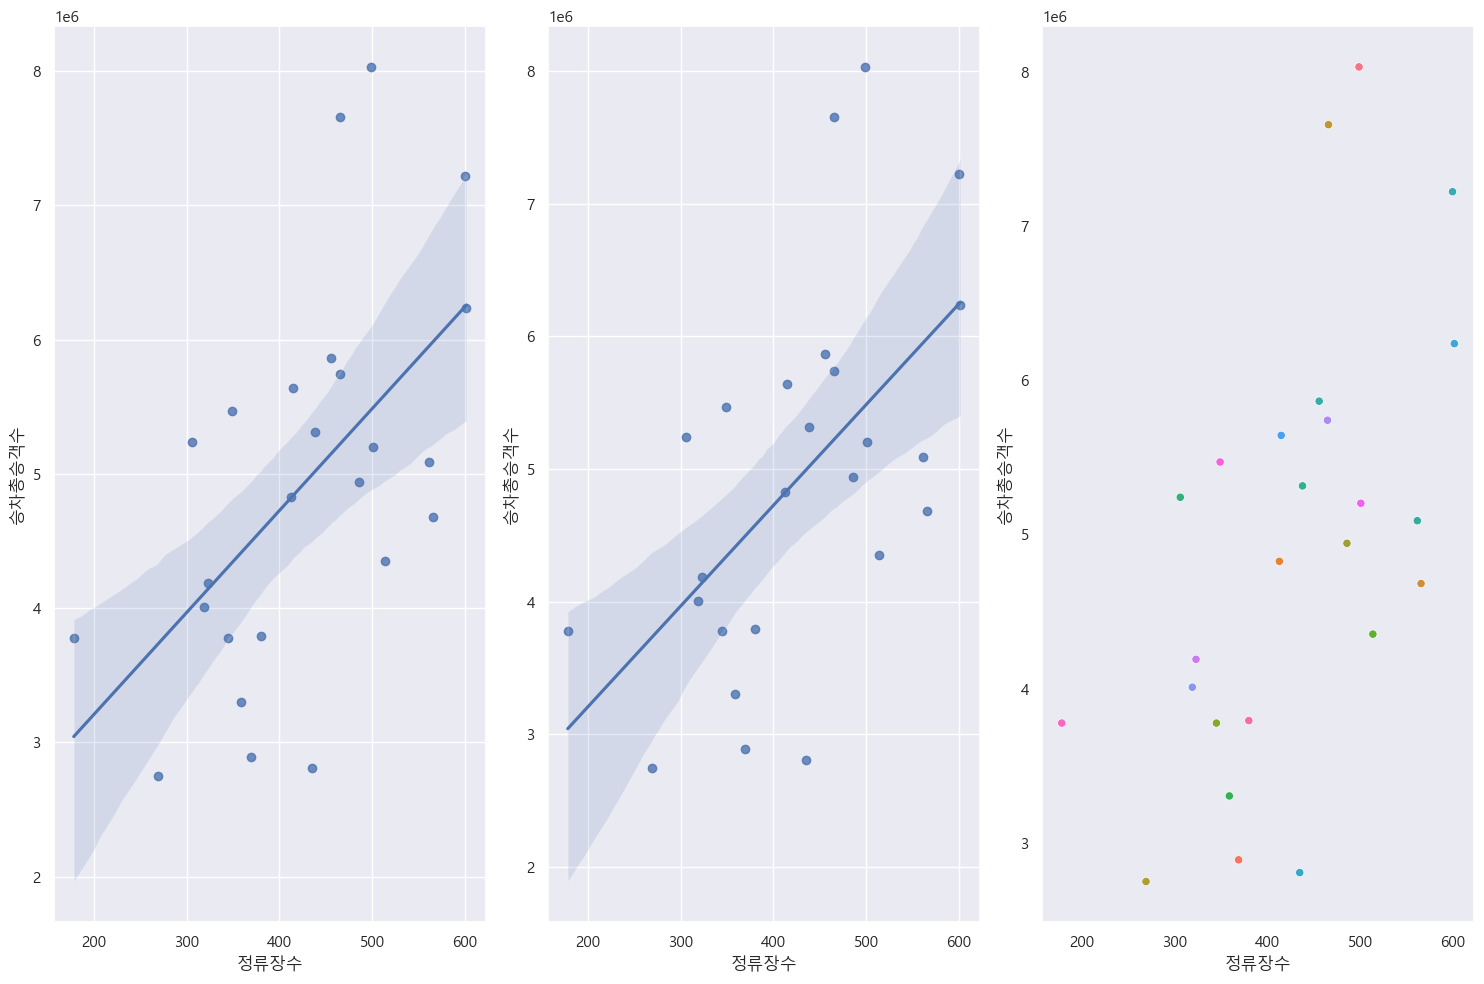

승차총승객수 : PearsonRResult(statistic=0.5666813370974586, pvalue=0.003141977397117319)


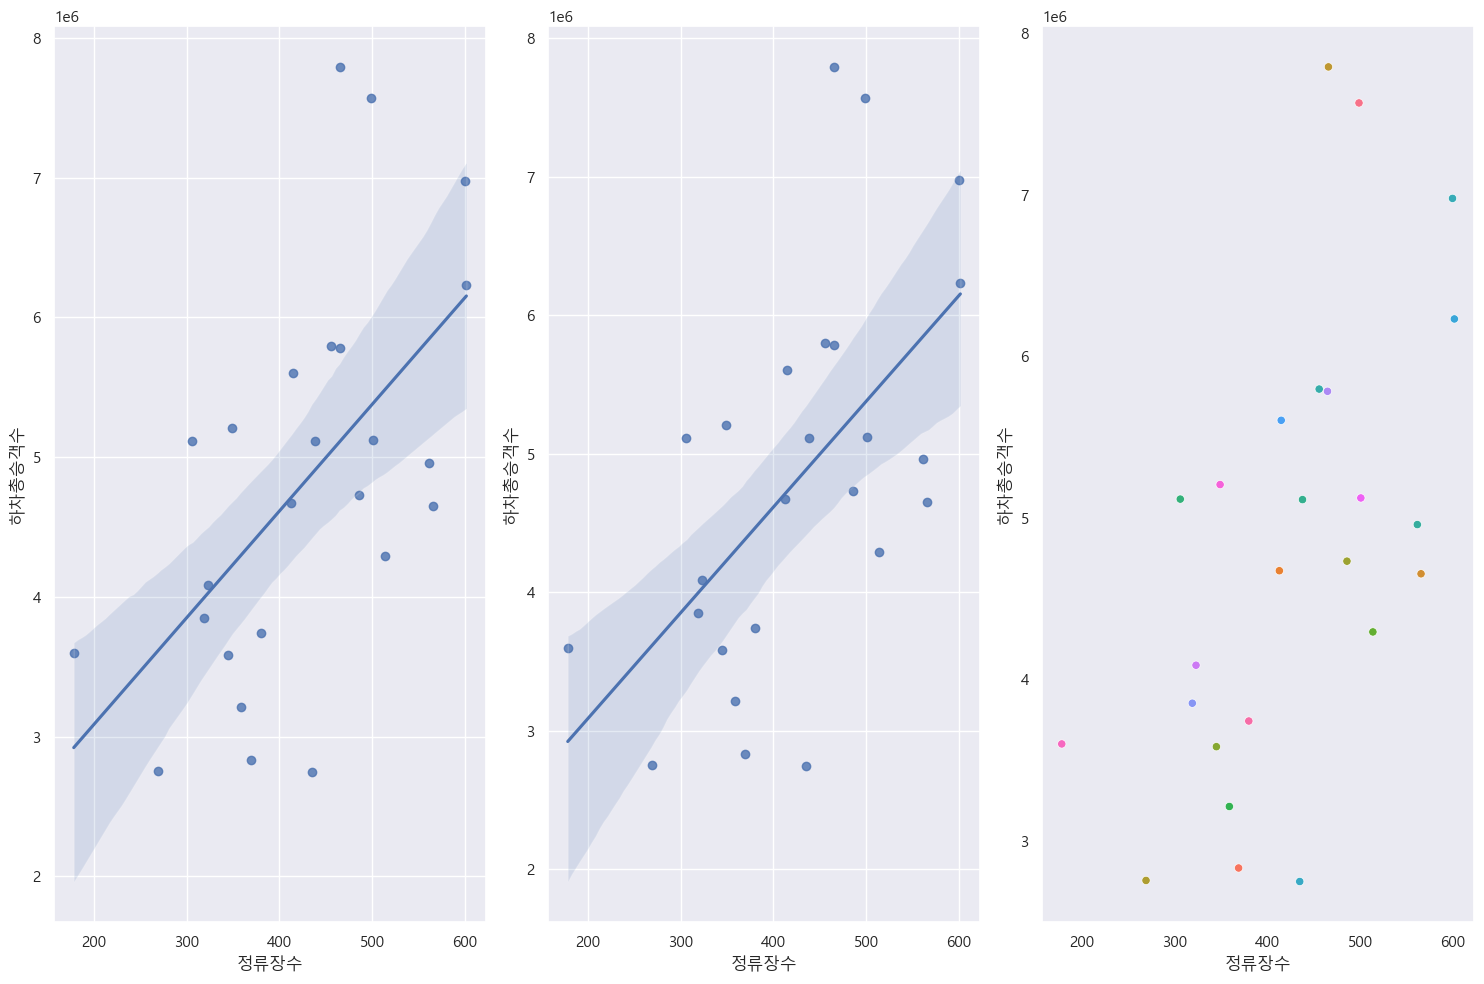

하차총승객수 : PearsonRResult(statistic=0.5784790149467576, pvalue=0.0024518332034538645)


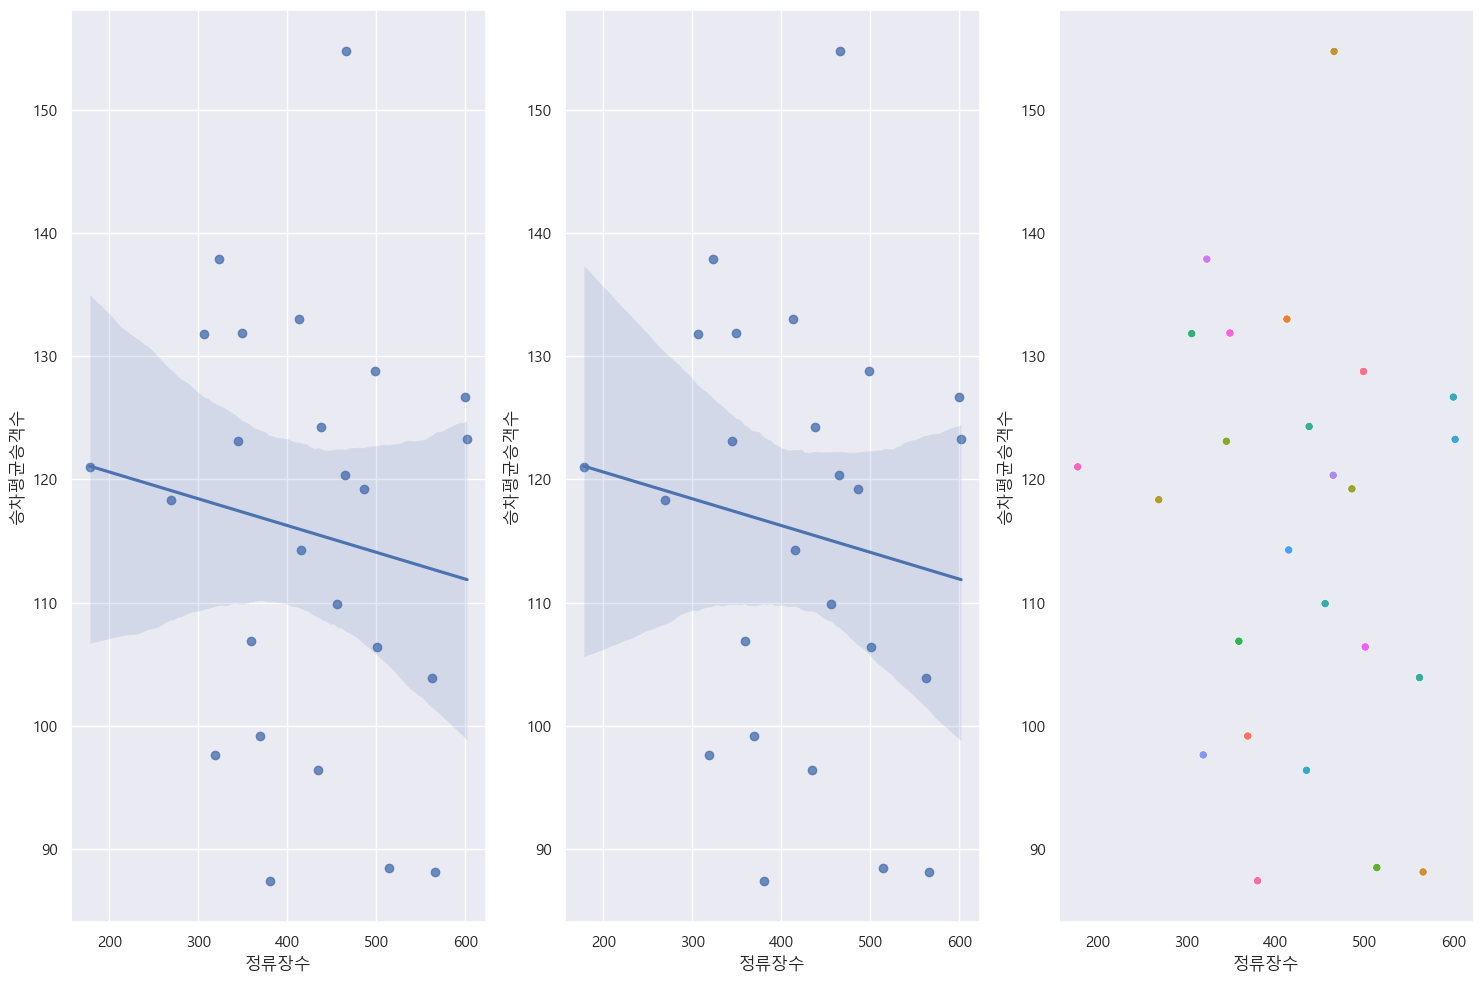

승차평균승객수 : PearsonRResult(statistic=-0.13531841122802116, pvalue=0.5189725687303929)


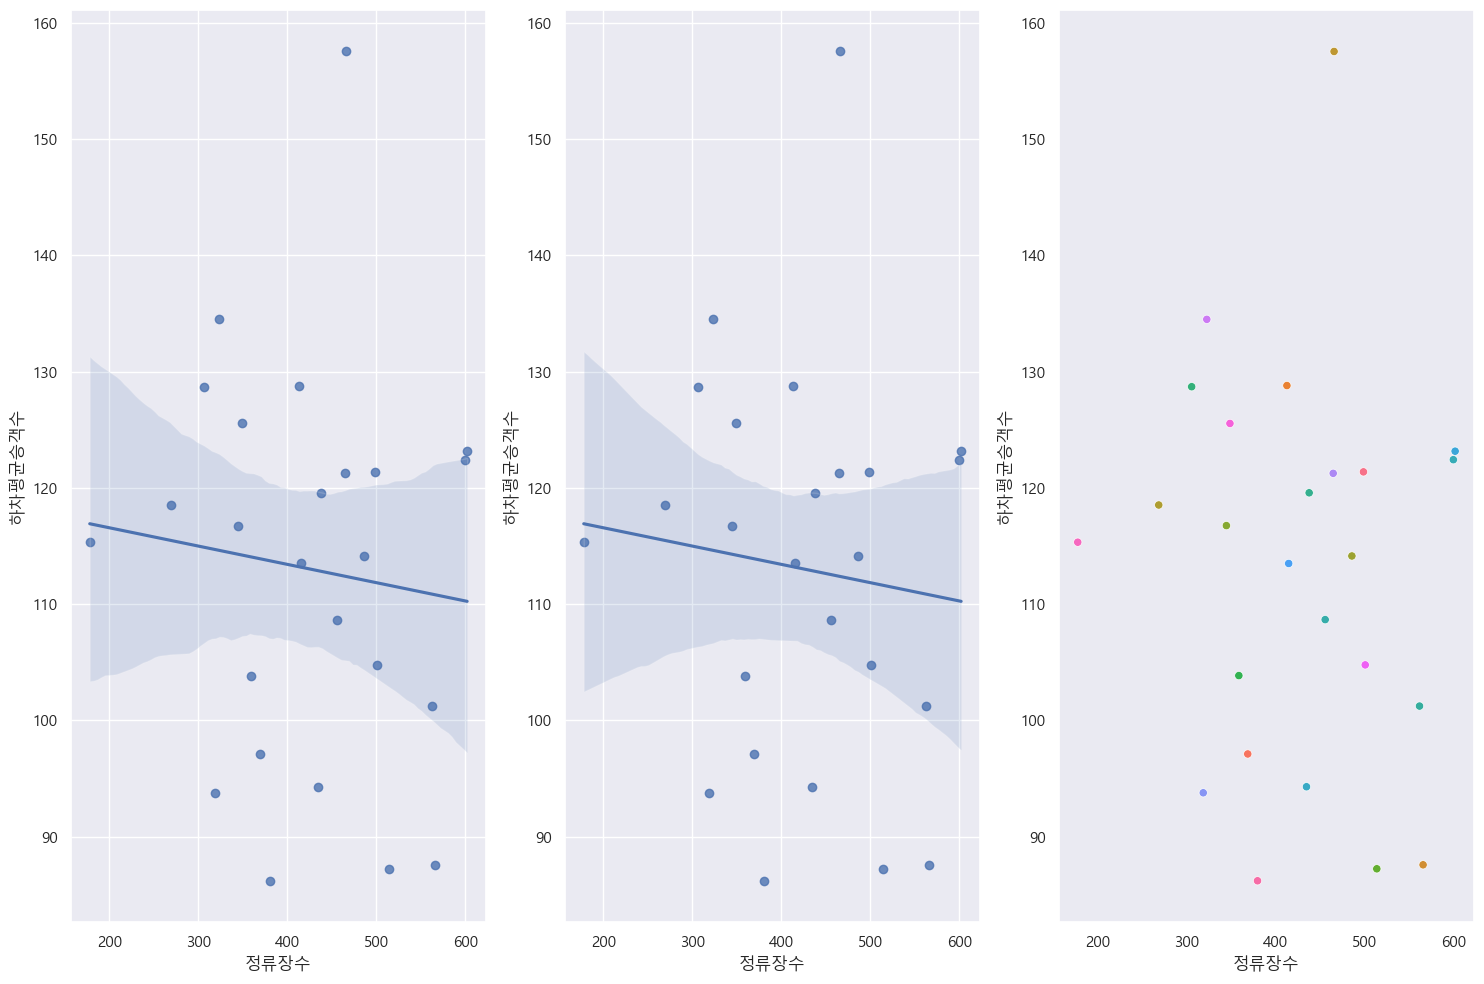

하차평균승객수 : PearsonRResult(statistic=-0.09914592134749221, pvalue=0.637273177989508)


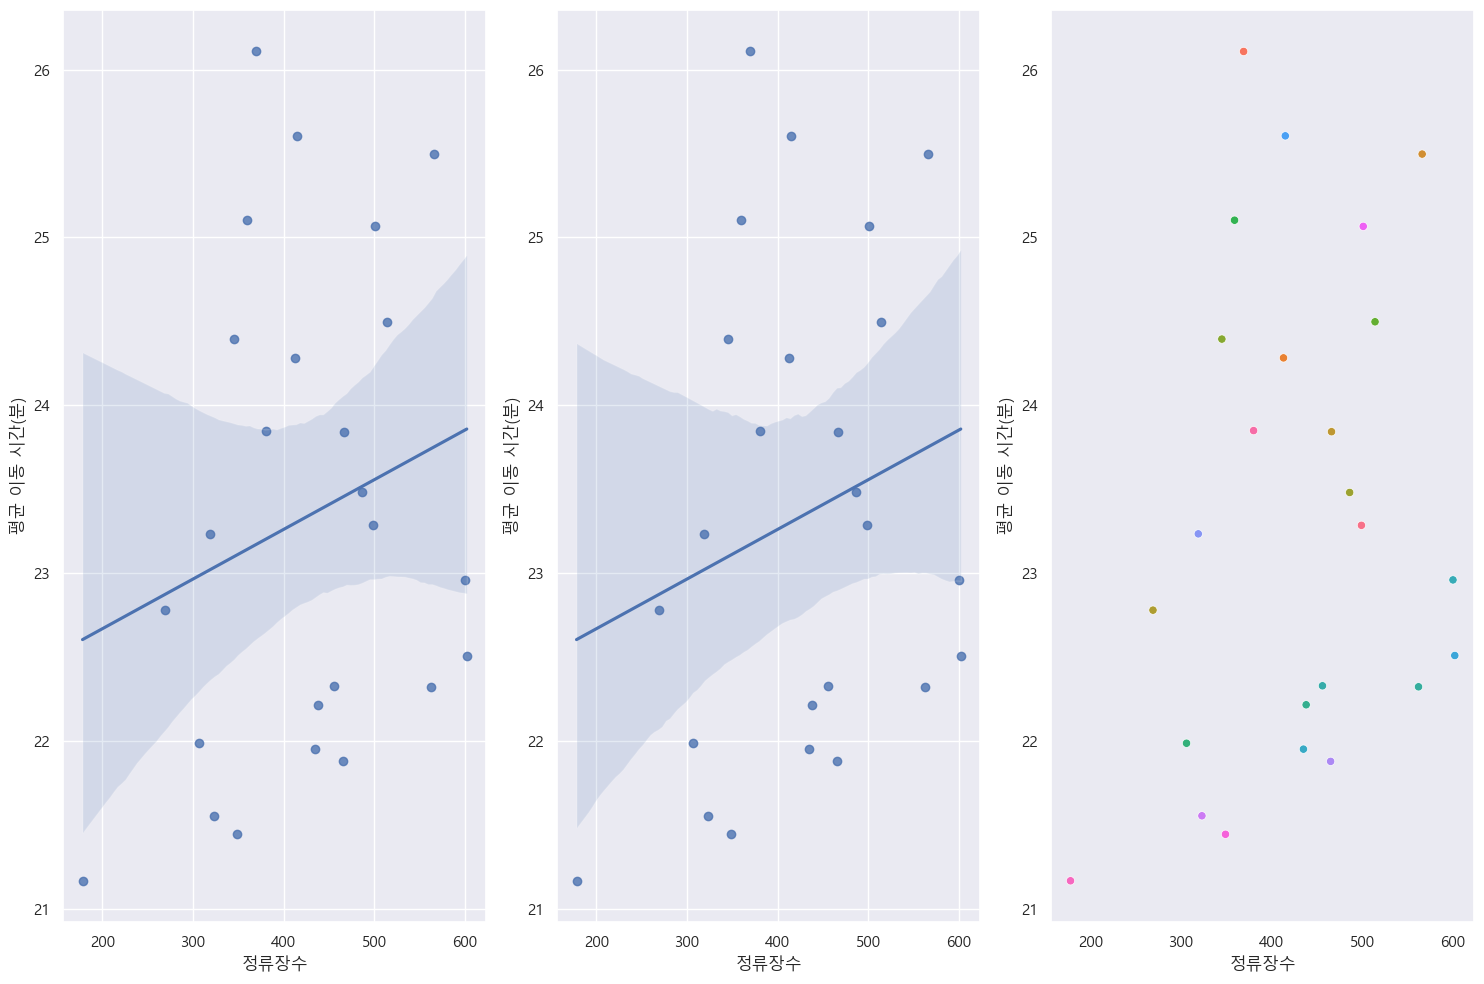

평균 이동 시간(분) : PearsonRResult(statistic=0.21945177217957054, pvalue=0.29188294040892454)


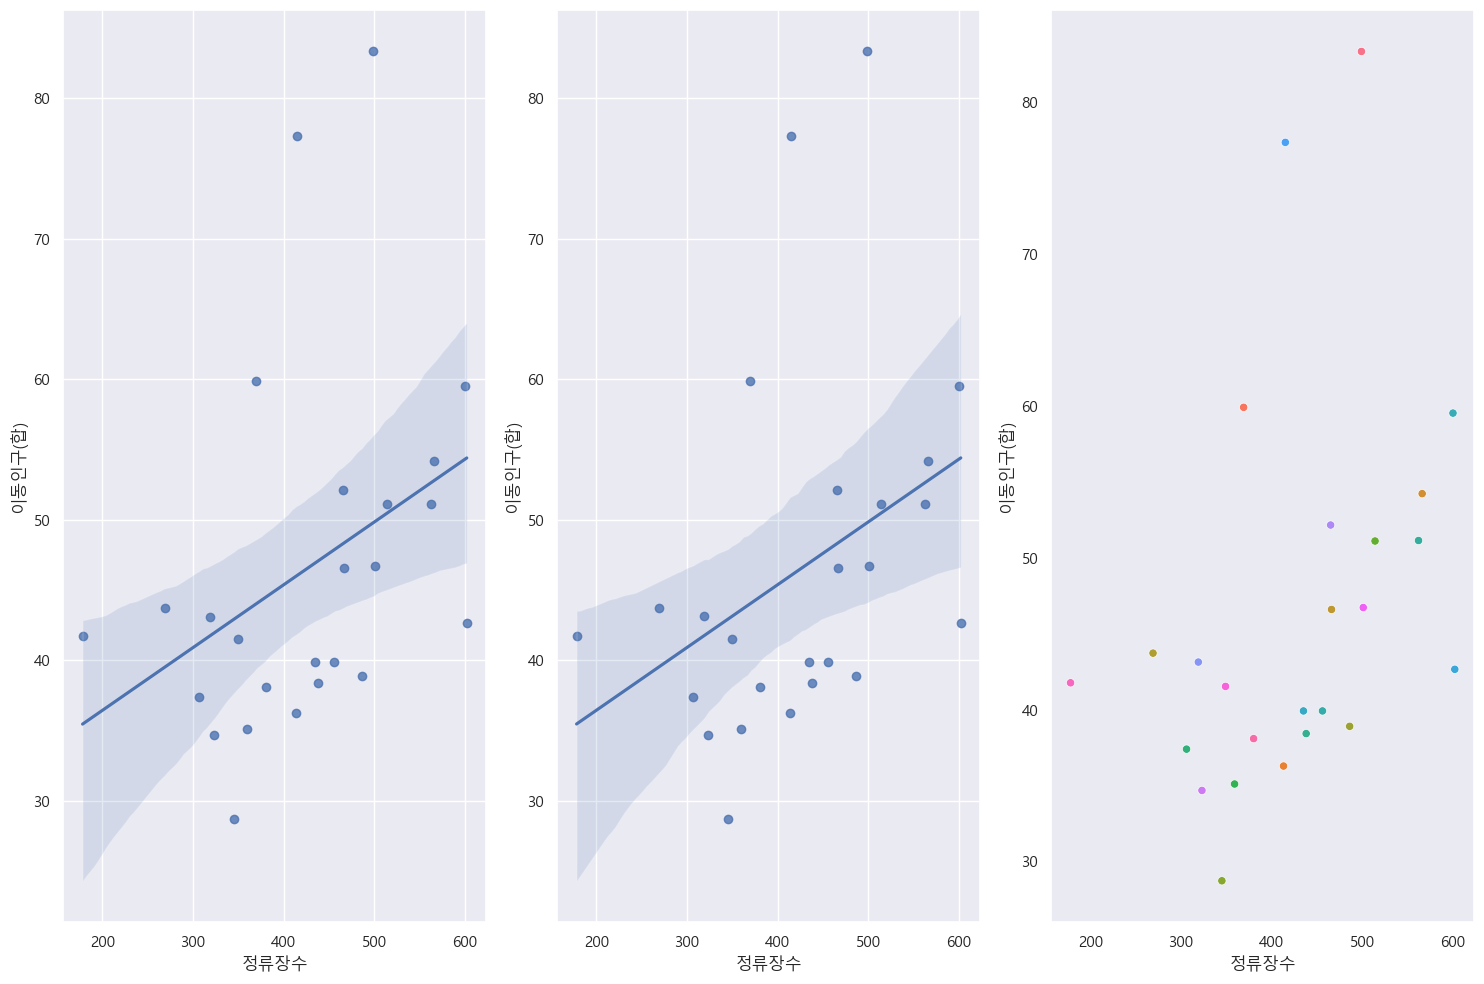

이동인구(합) : PearsonRResult(statistic=0.3711332281288715, pvalue=0.06777105417986702)


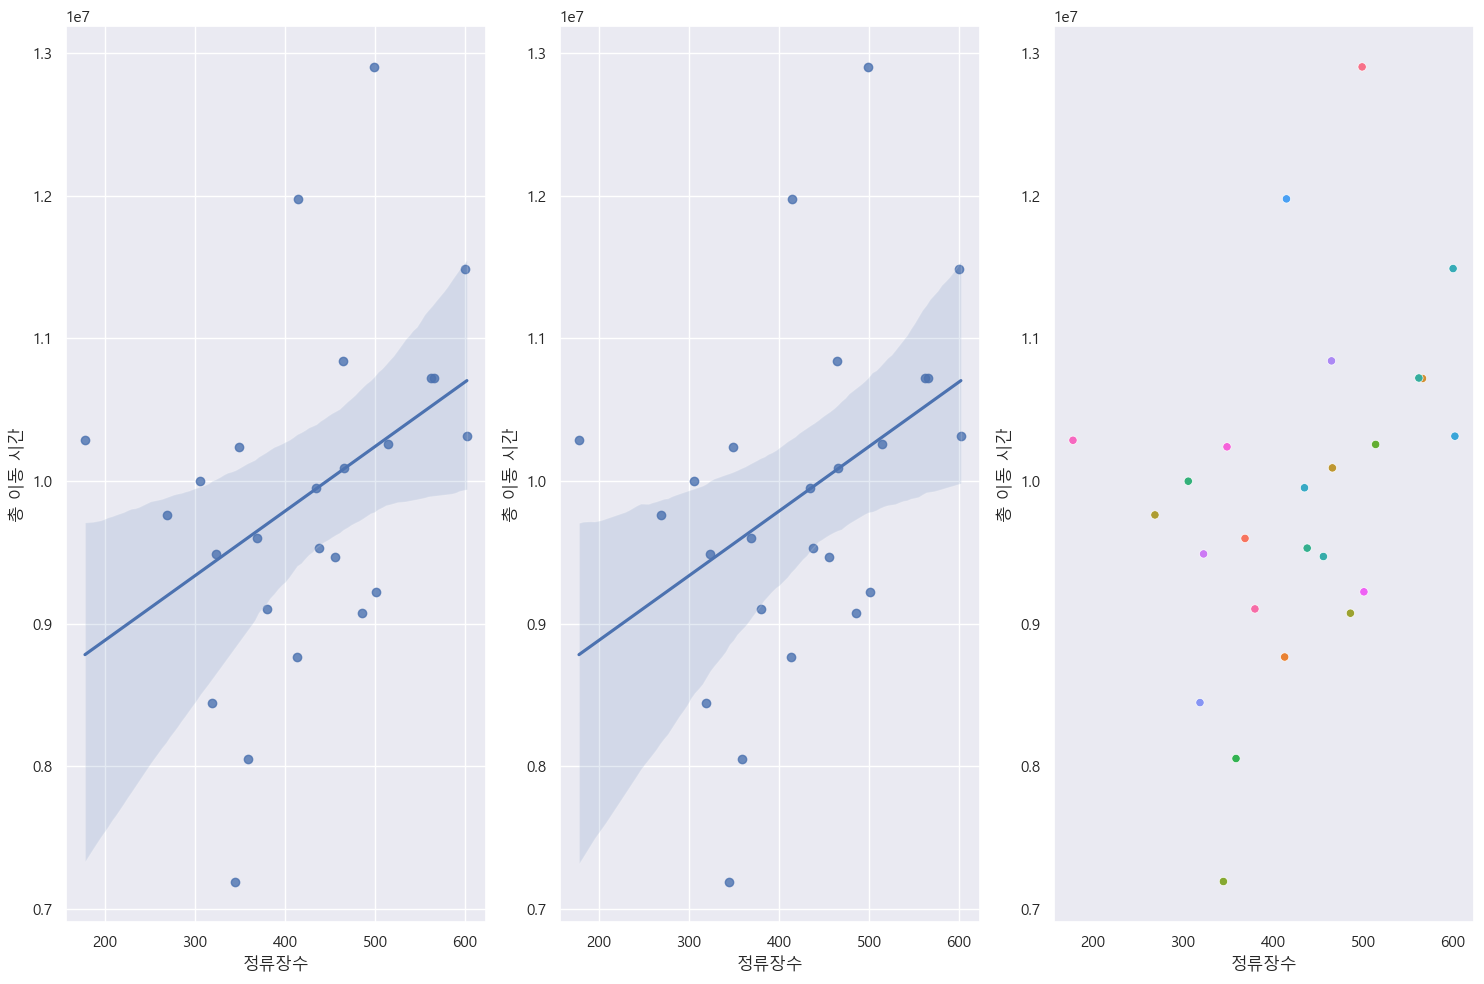

총 이동 시간 : PearsonRResult(statistic=0.3975183836285089, pvalue=0.049092532793957214)


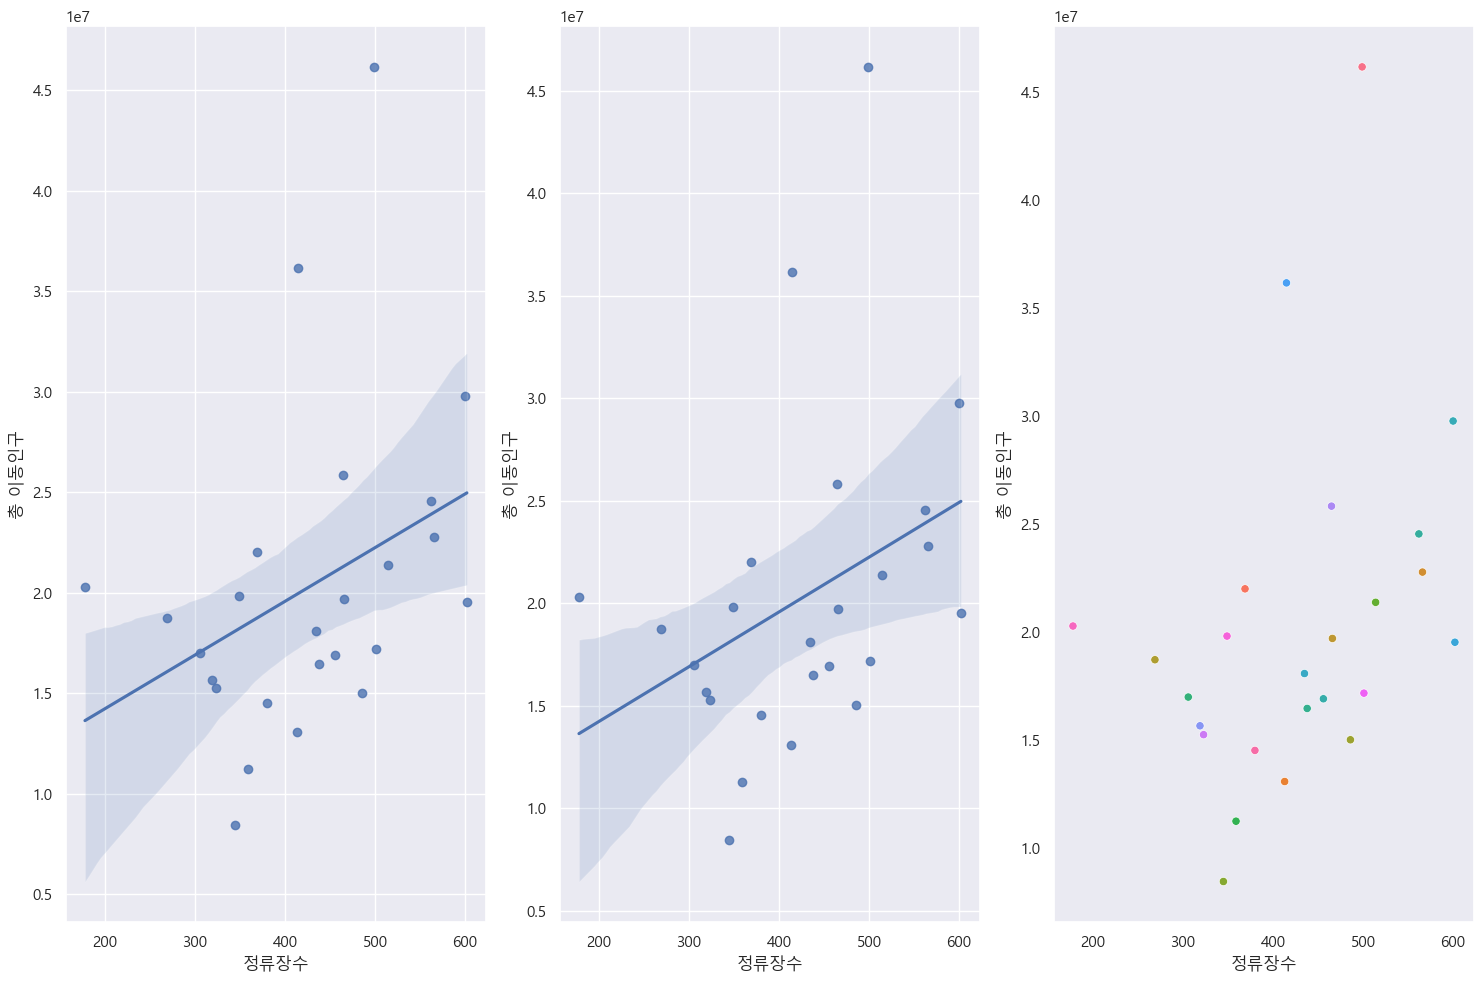

총 이동인구 : PearsonRResult(statistic=0.3585310360765819, pvalue=0.07842047180561913)


In [32]:
# 정류장 별 승하차
for i in use:
    plt.figure(figsize=(15,10))
    plt.subplot(1,3,1)
    sns.regplot(data=standard, x='정류장수', y=i)
    plt.subplot(1,3,2)
    sns.regplot(data=standard, x='정류장수', y=i)
    plt.subplot(1,3,3)
    sns.scatterplot(data=standard, x='정류장수', y=i, hue=target, legend=False)
    plt.grid()
    plt.tight_layout()
    plt.show()
    
    result = spst.pearsonr(standard['정류장수'], standard[i])
    print(f'{i} : {result}')

##### 가설 1-1 정류장수 별 이용자 ( 상관관계 )
1. 승/하차총승객수와 관계에서는 상관계수 0.5 이상으 큰 관계가 있어 보임
2. 승/하차평균승객수와 관계에서는 상관계수 0.13, 0.09로 관계가 거의 없어 보임
3. 이동인구 평균과 총합의 관계에서 상관계사 0.3 정도의 약간의 관계가 있어 보임

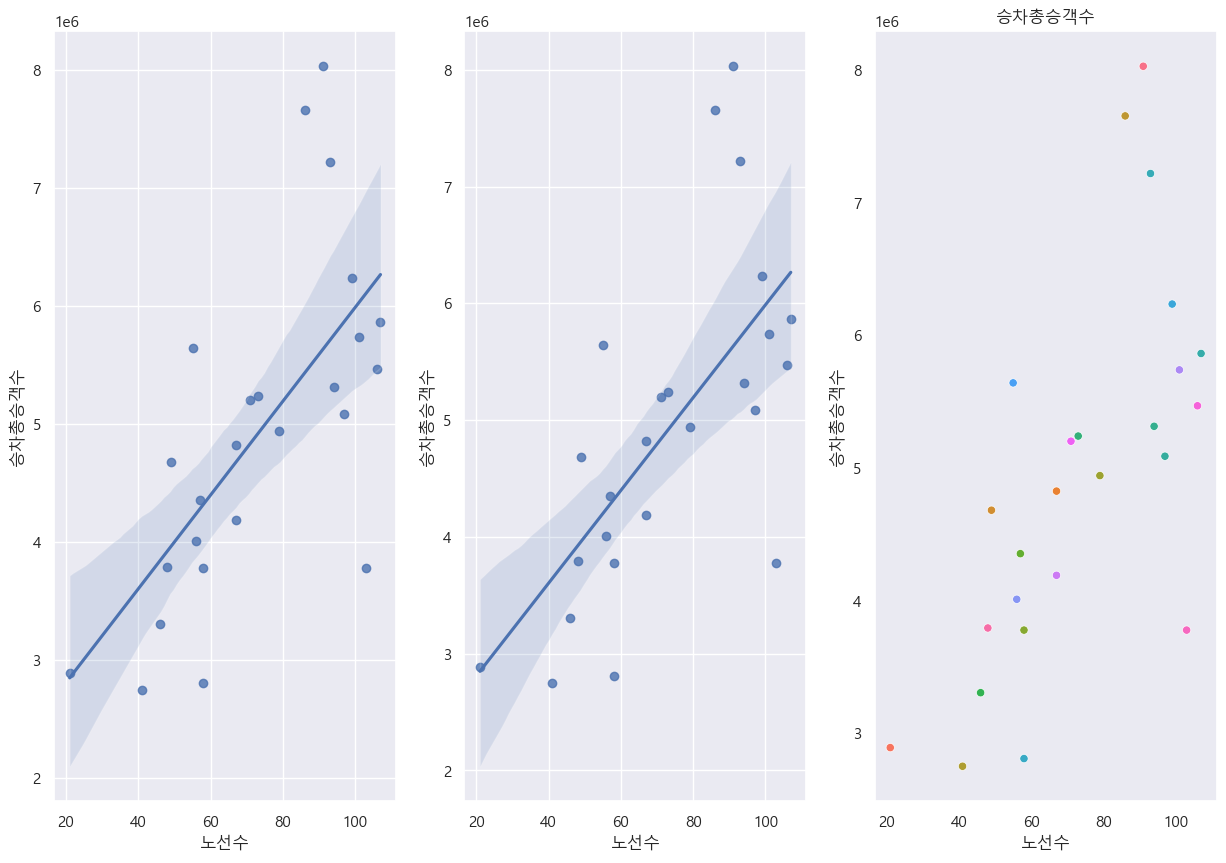

승차총승객수 : PearsonRResult(statistic=0.6654877832095705, pvalue=0.0002830862285771965)


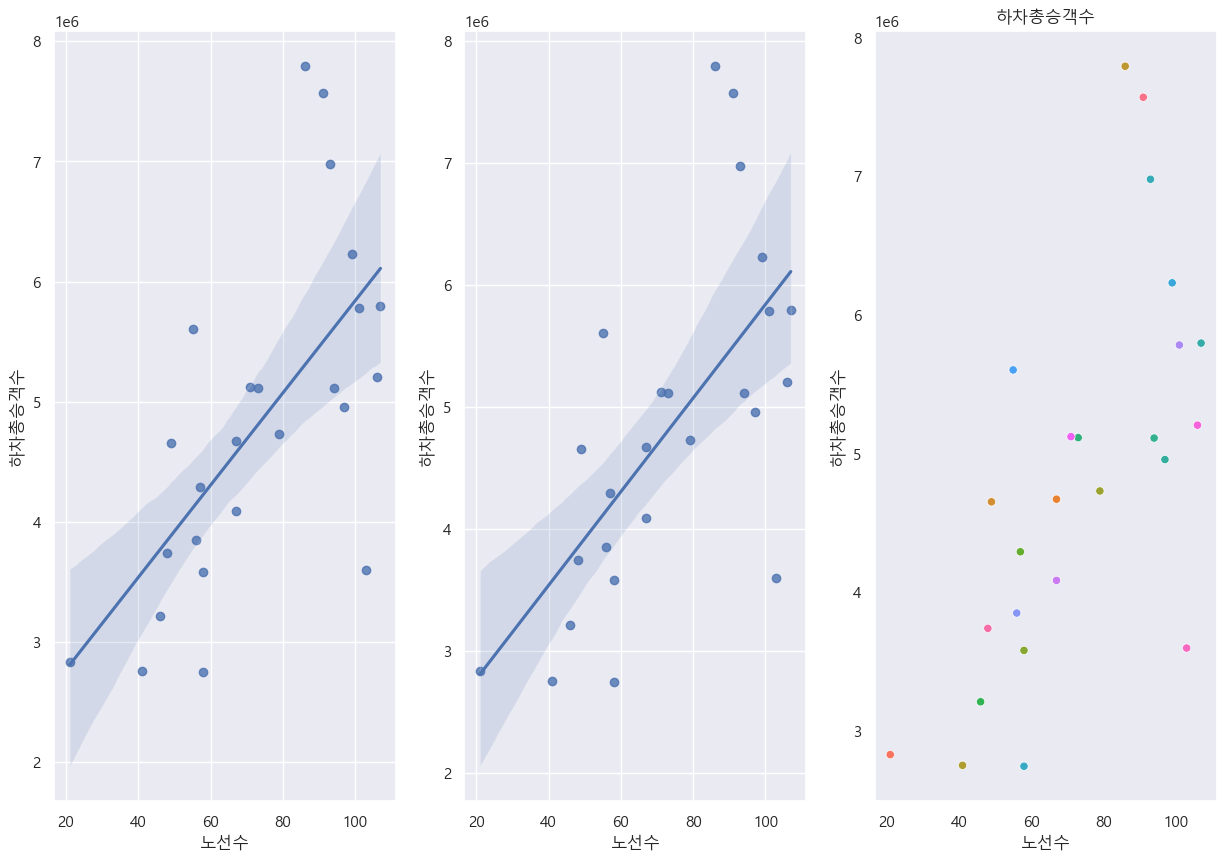

하차총승객수 : PearsonRResult(statistic=0.6526422720355217, pvalue=0.00040610118937178525)


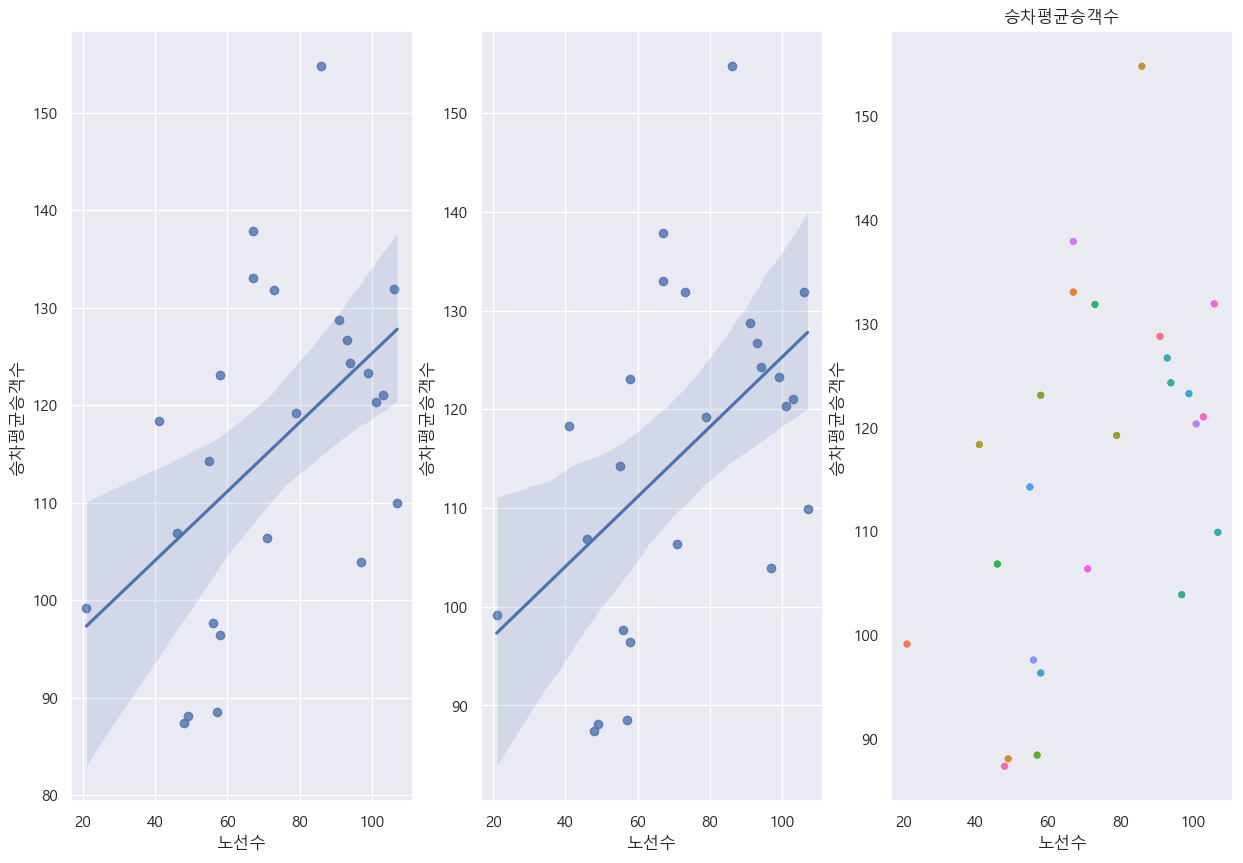

승차평균승객수 : PearsonRResult(statistic=0.4935407909274122, pvalue=0.012170019218131729)


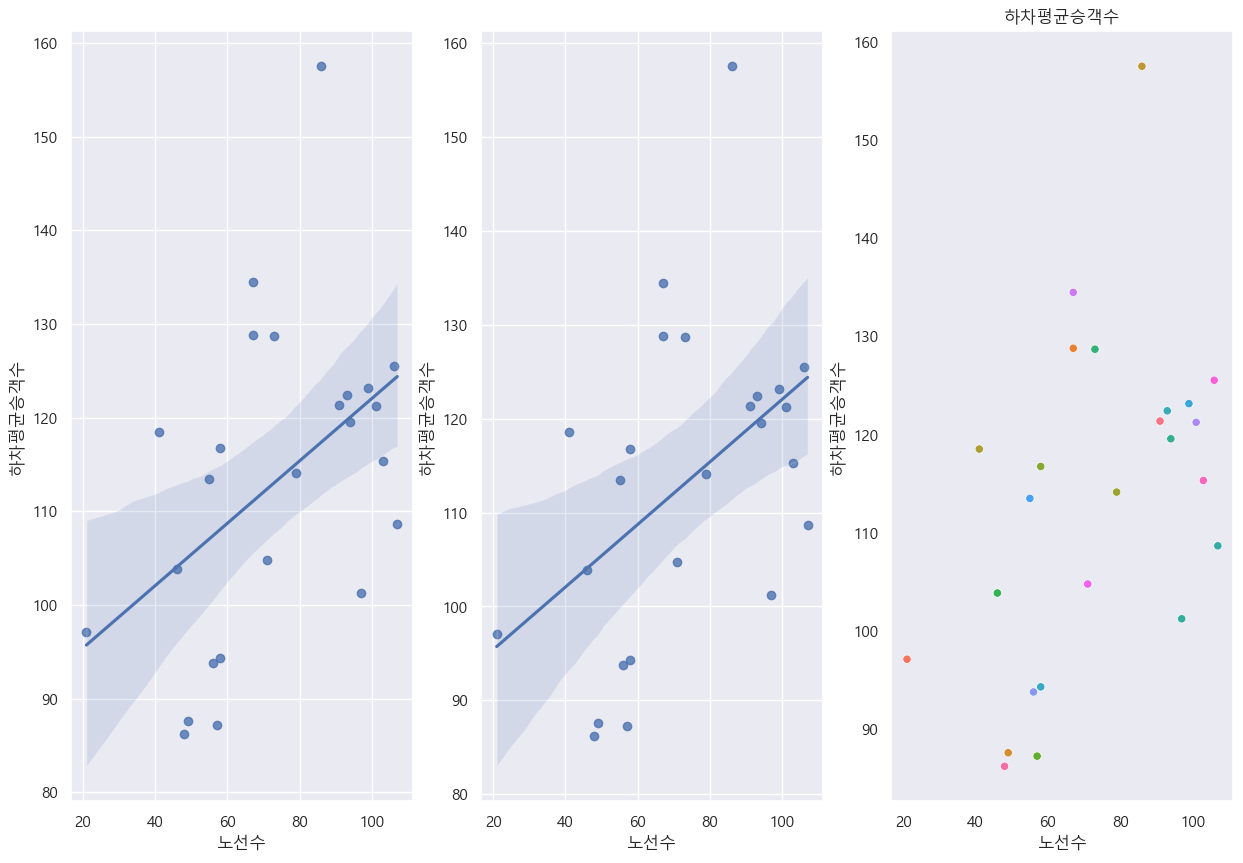

하차평균승객수 : PearsonRResult(statistic=0.4704401254149345, pvalue=0.017632441540646464)


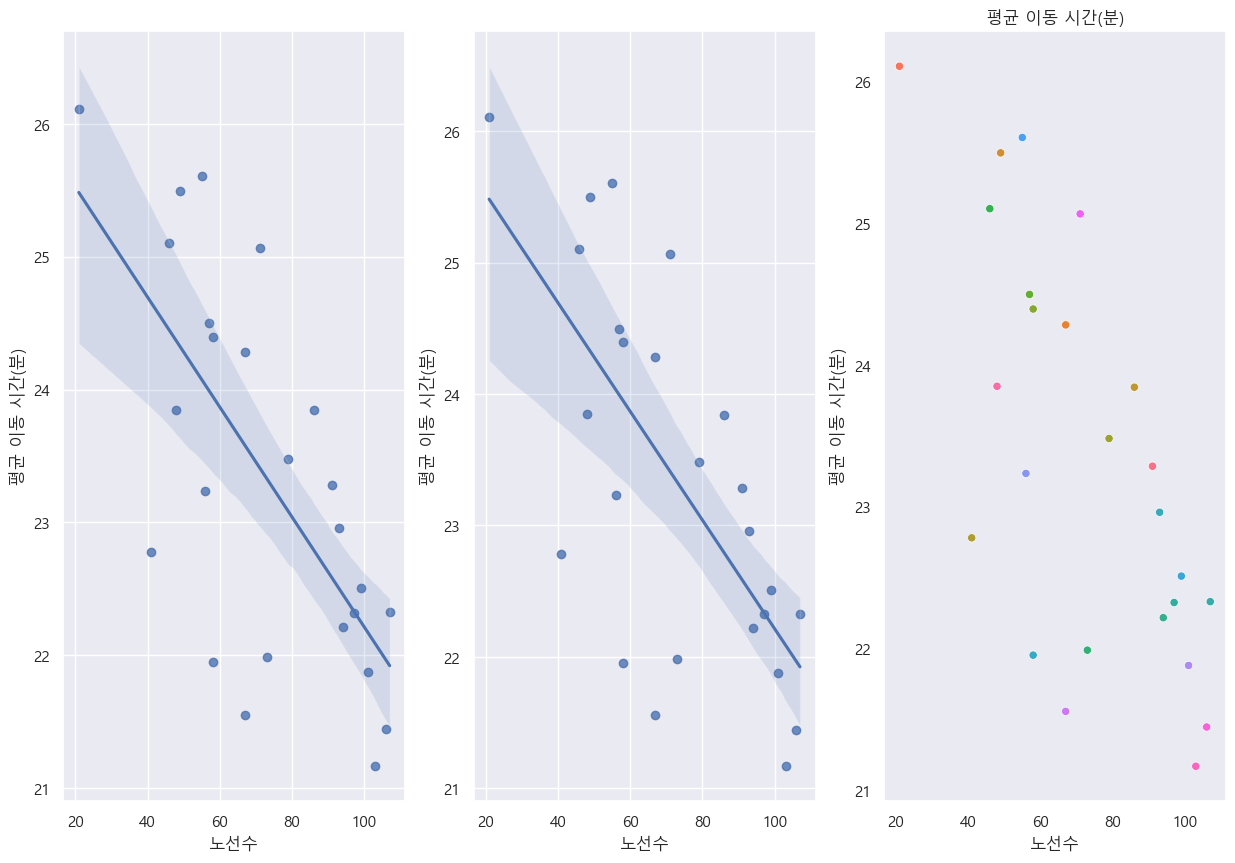

평균 이동 시간(분) : PearsonRResult(statistic=-0.6874048303585872, pvalue=0.00014680687151646357)


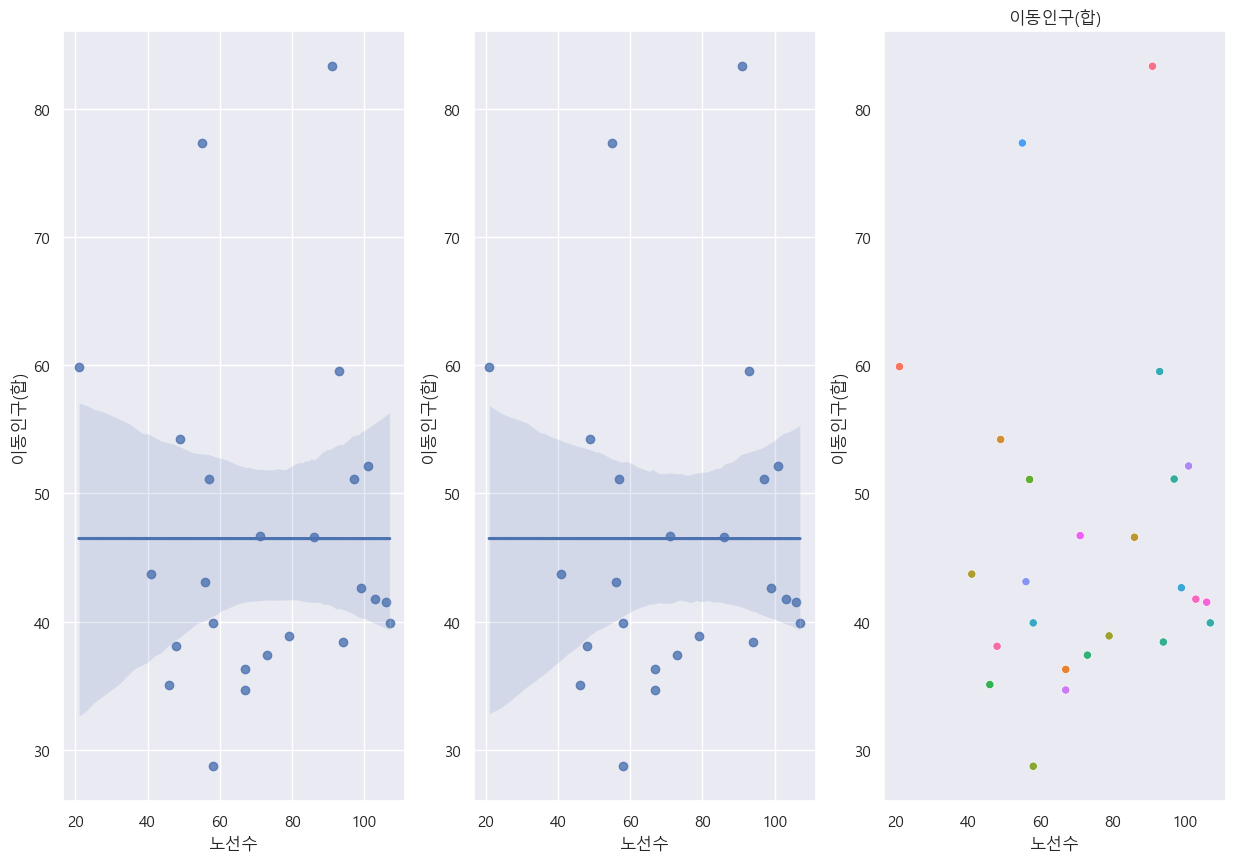

이동인구(합) : PearsonRResult(statistic=-0.000111318852328849, pvalue=0.9995786397407214)


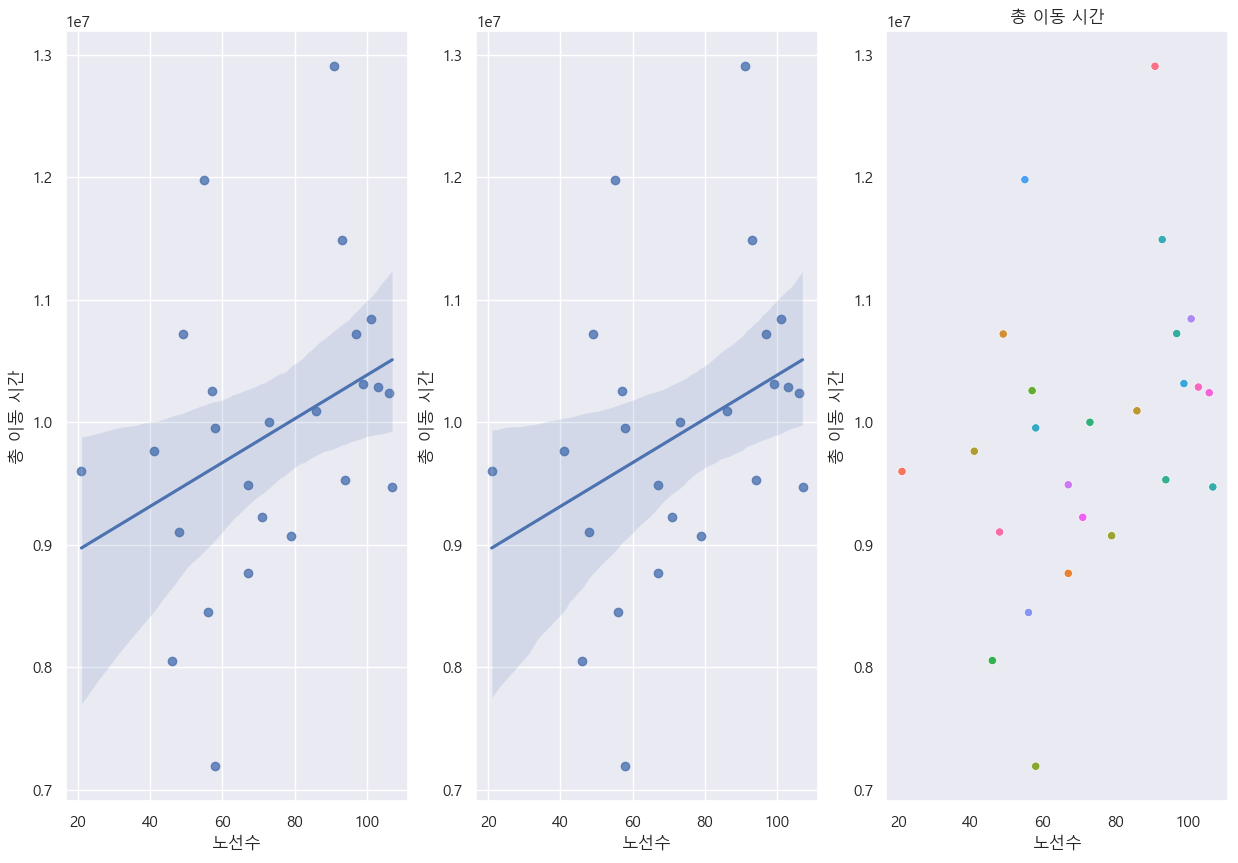

총 이동 시간 : PearsonRResult(statistic=0.3509799349826018, pvalue=0.08538325993557443)


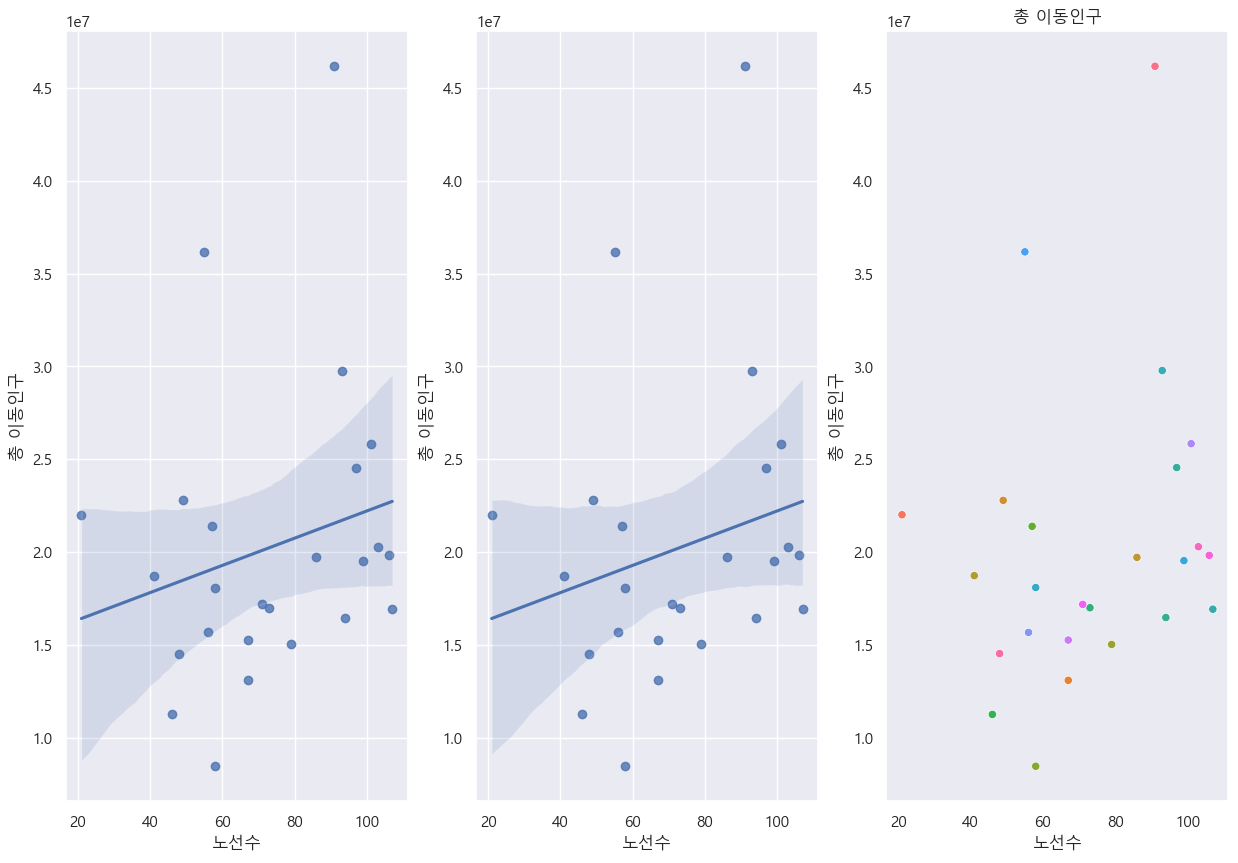

총 이동인구 : PearsonRResult(statistic=0.22044113587699826, pvalue=0.2896579647452525)


In [33]:
# 노선 별 승하차
for i in use:
    plt.figure(figsize=(15,10))
    plt.subplot(1,3,1)
    sns.regplot(data=standard, x='노선수', y=i)
    plt.subplot(1,3,2)
    sns.regplot(data=standard, x='노선수', y=i)
    plt.subplot(1,3,3)
    sns.scatterplot(data=standard, x='노선수', y=i, hue=target, legend=False)
    plt.grid()
    plt.title(i)
    plt.show()
    
    result = spst.pearsonr(standard['노선수'], standard[i])
    print(f'{i} : {result}')

##### 가설 1-2 노선수 별 이용
1. 승/하차총승객수와 관계에서는 상관계수 0.6 이상으 큰 관계가 있어 보임
2. 승/하차평균승객수와 관계에서는 상관계수 0.4 정도의 약간의 관계가 있어 보임
3. 이동인구평균의 관계에서는 상관계수 0.0001로 관계가 없어 보임
4. 총이동인구의 관계에서는 상관계수 0.2 정도의 약간의 관계가 있어 보임

In [34]:
# 자치구별 하나의 정류장/노선 당 이용자
standard['승차승객/정류장수'] = standard['승차총승객수'] / standard['정류장수']
standard['하차승객/정류장수'] = standard['하차총승객수'] / standard['정류장수']
standard['이동인구(합)/정류장수'] = standard['이동인구(합)'] / standard['정류장수']
standard['총 이동인구/정류장수'] = standard['총 이동인구'] / standard['정류장수']

standard['승차승객/노선수'] = standard['승차총승객수'] / standard['노선수']
standard['하차승객/노선수'] = standard['하차총승객수'] / standard['노선수']
standard['총 이동인구/노선수'] = standard['총 이동인구'] / standard['노선수']

standard[['승차승객/정류장수' , '하차승객/정류장수', '이동인구(합)/정류장수', '총 이동인구/정류장수', '승차승객/노선수' , '하차승객/노선수', '총 이동인구/노선수']].describe()

,승차승객/정류장수,하차승객/정류장수,이동인구(합)/정류장수,총 이동인구/정류장수,승차승객/노선수,하차승객/노선수,총 이동인구/노선수
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,2.500000e+01
mean,11922.706529,11633.129072,0.114962,49791.071055,71363.061299,69811.839657,3.143267e+05
std,3377.156483,3232.972114,0.039127,21331.179426,20555.684617,20471.192599,1.964007e+05
min,6453.517241,6314.340230,0.070845,24545.827449,36666.747573,34941.087379,1.460054e+05
25%,9980.371053,9734.551440,0.090966,37118.861601,56830.445545,57259.514851,1.970196e+05
50%,11683.246973,11311.823245,0.099399,42314.718455,71592.357143,68770.946429,2.447850e+05
75%,12972.065015,12712.631579,0.122204,55573.284216,77648.709677,75310.947368,3.202278e+05
max,21217.275281,20218.719101,0.234612,114005.738371,137621.571429,134786.000000,1.048296e+06


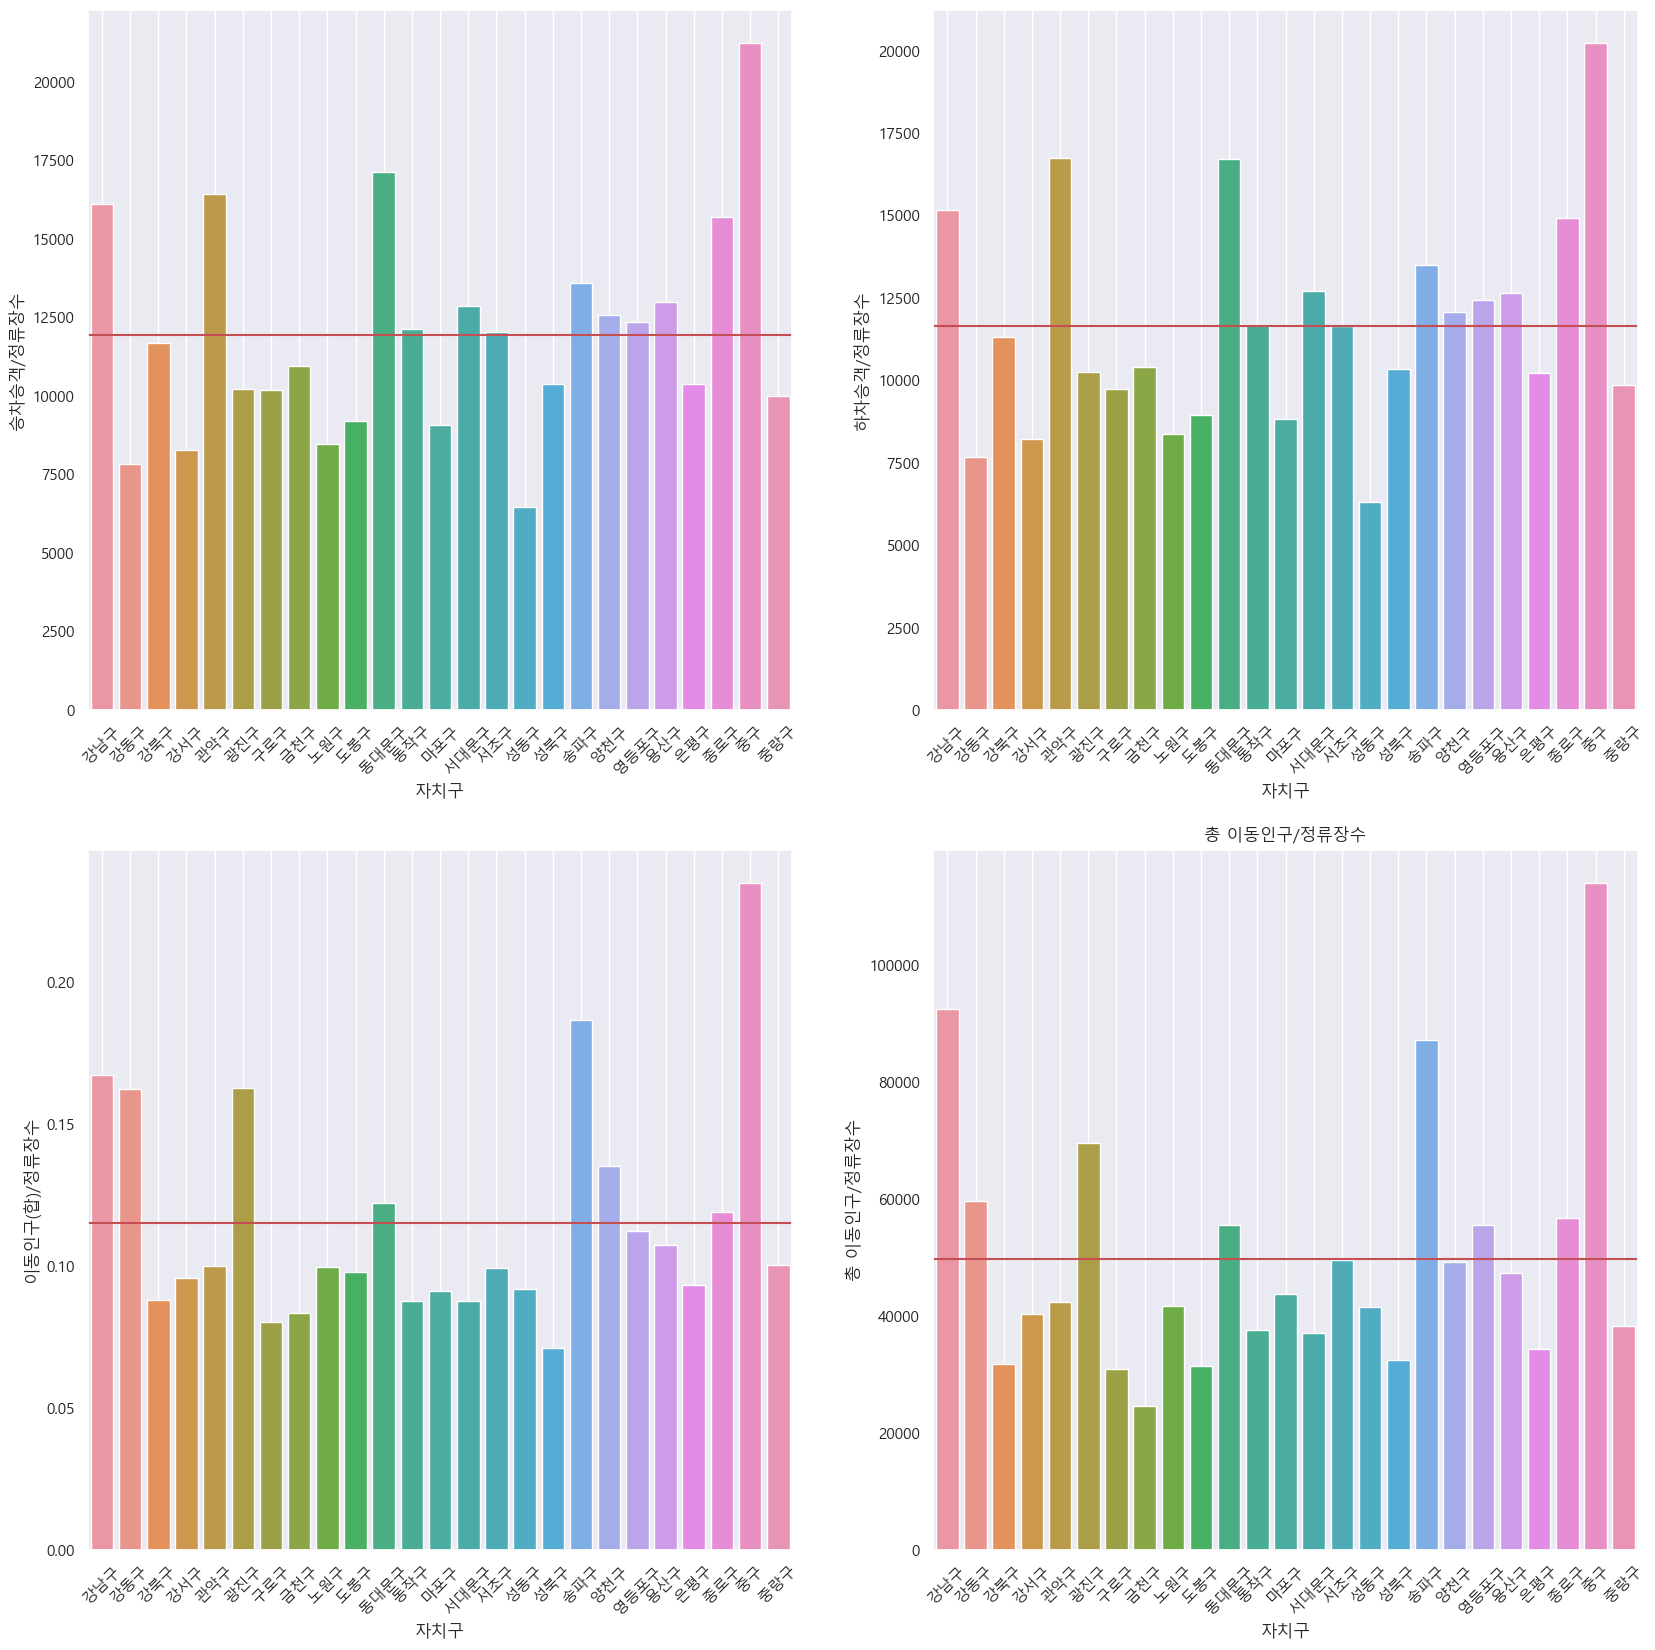

In [35]:
# 자치구별 1 정류장 당 이용자
li = ['승차승객/정류장수' , '하차승객/정류장수', '이동인구(합)/정류장수', '총 이동인구/정류장수']
count = 1
plt.figure(figsize=(20,20))
for i in li:
    plt.subplot(2,2,count)
    sns.barplot(data=standard, x=target, y = i)
    plt.axhline(standard[i].mean(), color='r')
    plt.xticks(rotation=45)
    plt.grid()
    count += 1
plt.title(i)
plt.show()

In [36]:
# ['승차승객/정류장수' , '하차승객/정류장수', '이동인구(합)/정류장수', '총 이동인구/정류장수']
tmp1 = standard.loc[(standard['승차승객/정류장수'] > standard['승차승객/정류장수'].mean())
                        & (standard['하차승객/정류장수'] > standard['하차승객/정류장수'].mean())
                        & (standard['이동인구(합)/정류장수'] > standard['이동인구(합)/정류장수'].mean())
                        & (standard['총 이동인구/정류장수'] > standard['총 이동인구/정류장수'].mean())]
tmp1['자치구']

0      강남구
10    동대문구
17     송파구
22     종로구
23      중구
Name: 자치구, dtype: object

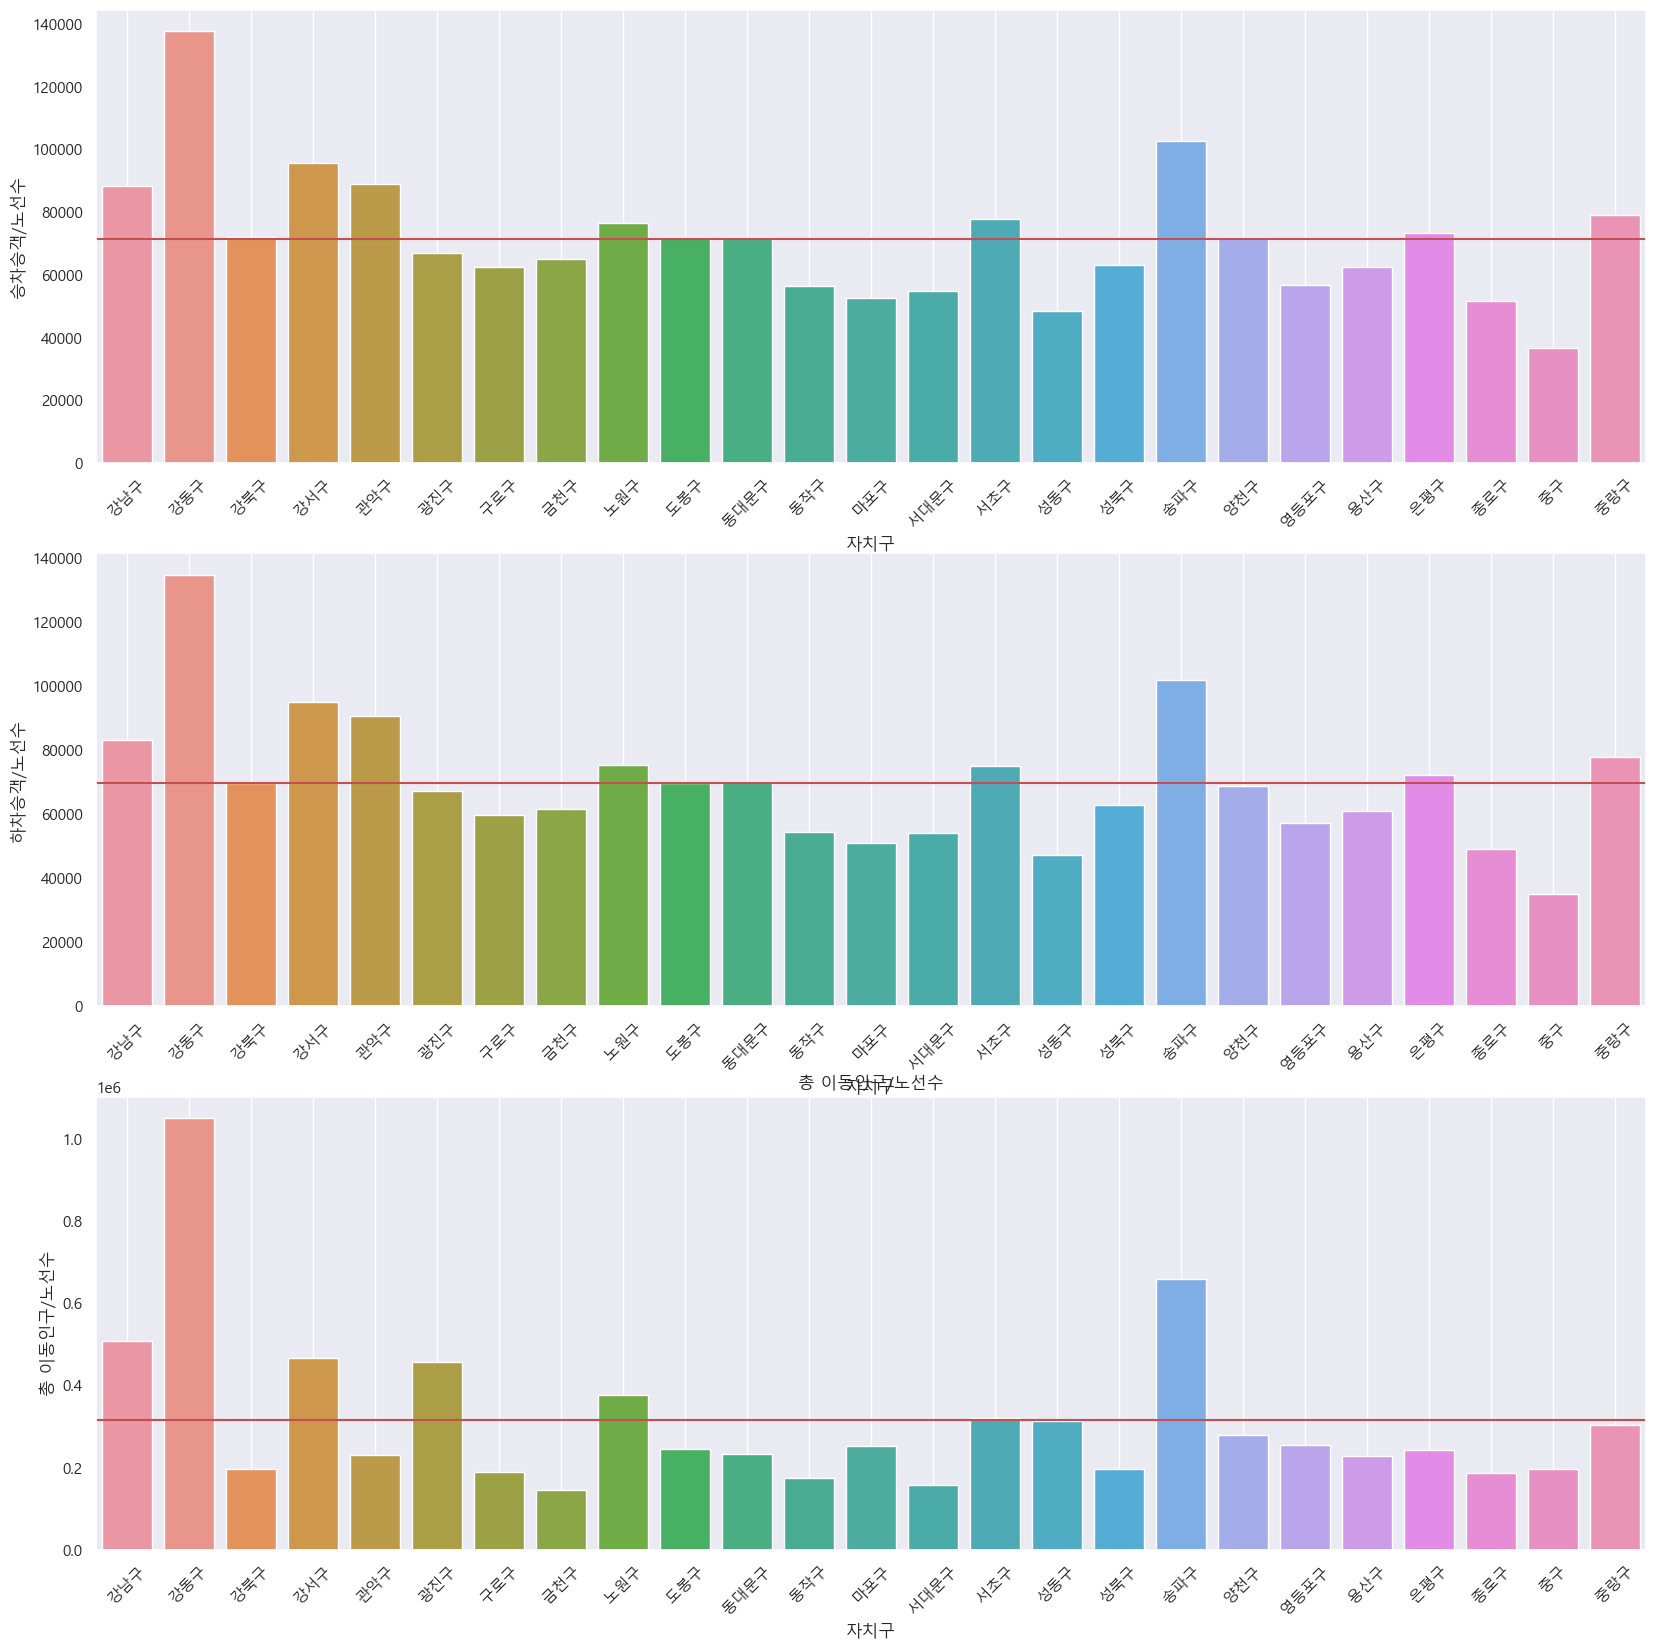

In [37]:
# 자치구별 1 노선 당 이용자
li = ['승차승객/노선수' , '하차승객/노선수', '총 이동인구/노선수']
count = 1
plt.figure(figsize=(20,20))
for i in li:
    plt.subplot(3,1,count)
    sns.barplot(data=standard, x=target, y = i)
    plt.axhline(standard[i].mean(), color='r')
    plt.xticks(rotation=45)
    plt.grid()
    count += 1
plt.title(i)
plt.show()

In [38]:
# ['승차승객/노선수' , '하차승객/노선수', '총 이동인구/노선수']
tmp2 = standard.loc[(standard['승차승객/노선수'] > standard['승차승객/노선수'].mean())
                        & (standard['하차승객/노선수'] > standard['하차승객/노선수'].mean())
                        & (standard['총 이동인구/노선수'] > standard['총 이동인구/노선수'].mean())]
tmp2['자치구']

0     강남구
1     강동구
3     강서구
8     노원구
14    서초구
17    송파구
Name: 자치구, dtype: object

In [39]:
tmp = standard.loc[(standard['승차승객/정류장수'] > standard['승차승객/정류장수'].mean())
                        & (standard['하차승객/정류장수'] > standard['하차승객/정류장수'].mean())
                        & (standard['이동인구(합)/정류장수'] > standard['이동인구(합)/정류장수'].mean())
                        & (standard['총 이동인구/정류장수'] > standard['총 이동인구/정류장수'].mean())
                        & (standard['승차승객/노선수'] > standard['승차승객/노선수'].mean())
                        & (standard['하차승객/노선수'] > standard['하차승객/노선수'].mean())
                        & (standard['총 이동인구/노선수'] > standard['총 이동인구/노선수'].mean())]

standard.loc[standard['자치구'].isin(tmp['자치구'])]

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구,승차승객/정류장수,하차승객/정류장수,이동인구(합)/정류장수,총 이동인구/정류장수,승차승객/노선수,하차승객/노선수,총 이동인구/노선수
0,강남구,499,91,8030483,7569213,128.767927,121.371512,23.284573,83.309306,12904380,46170267.4,16093.152305,15168.763527,0.166953,92525.585972,88247.065934,83178.164835,507365.575824
17,송파구,415,55,5641742,5603488,114.270072,113.495260,25.605607,77.326264,11978610,36174154.0,13594.559036,13502.380723,0.186328,87166.636145,102577.127273,101881.600000,657711.890909


### 가설 1 : 정류장과 노선 수 대비 이용자
<p>강남구/송파구</p>
<p>정류장과 노선의 수 대비 승/하차객과 이동인구의 상관관계에서 중간 이상의 지표를 가지고</p>
<p>지역구 별 하나의 정류장/노선 당 이용자가 높은 지역을 구함</p>

In [40]:
use = ['승차총승객수','하차총승객수','승차평균승객수','하차평균승객수', '이동인구(합)', '총 이동인구']

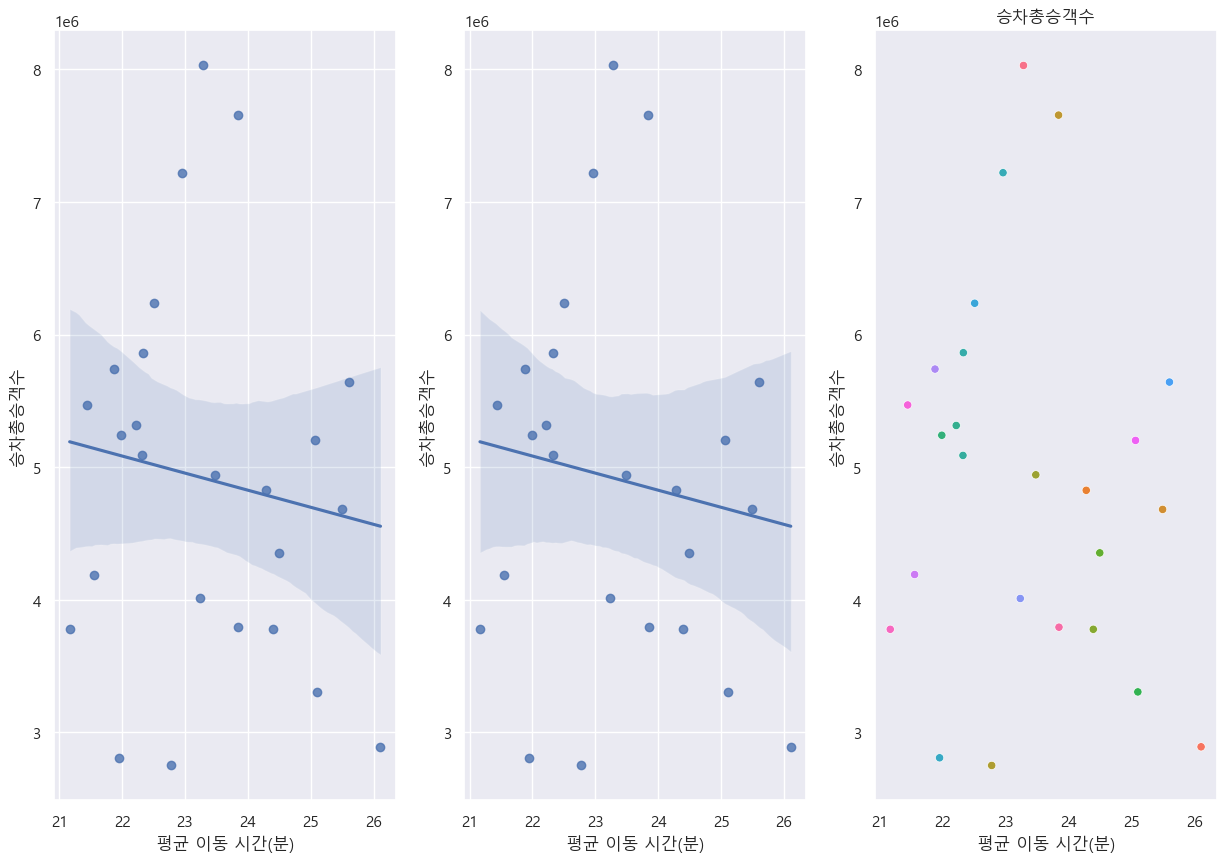

승차총승객수 : PearsonRResult(statistic=-0.13003622625415018, pvalue=0.5355647655353494)


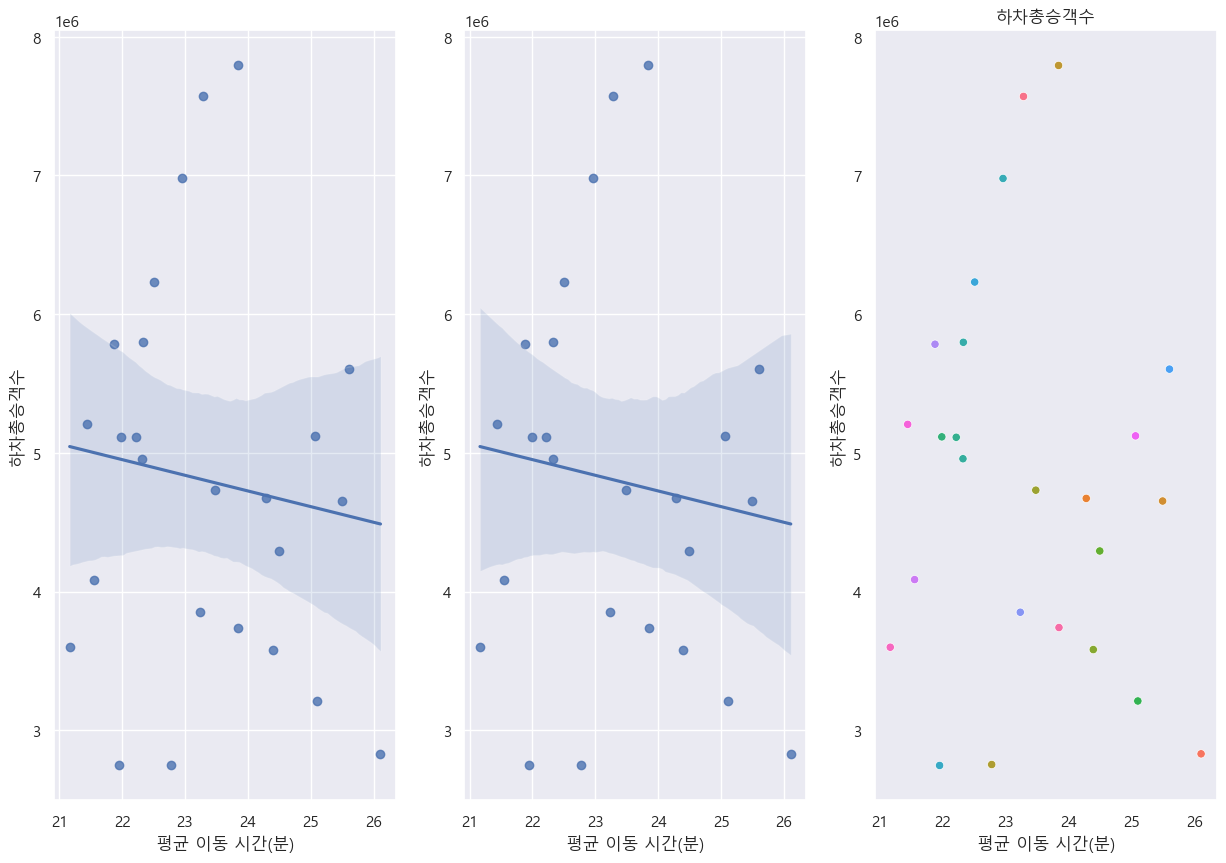

하차총승객수 : PearsonRResult(statistic=-0.11561132590784617, pvalue=0.5821045664261221)


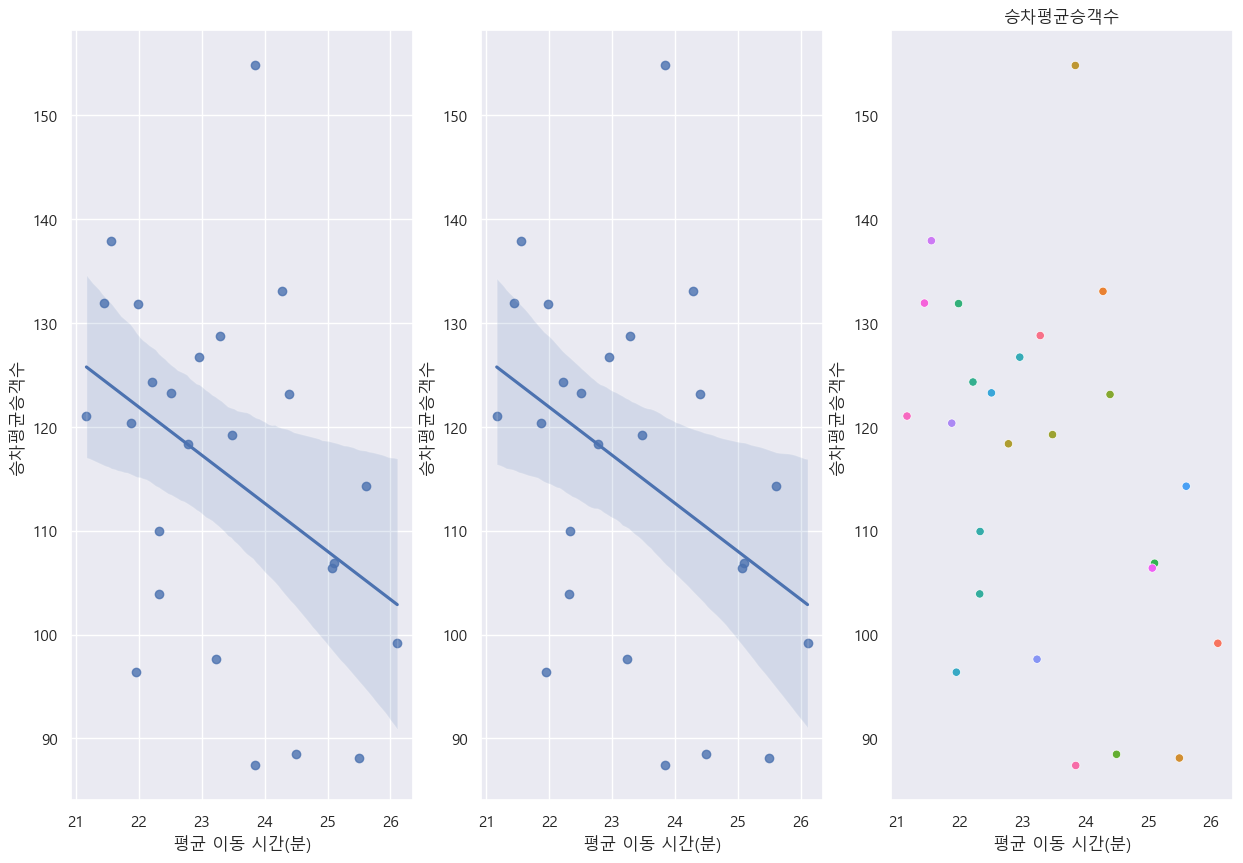

승차평균승객수 : PearsonRResult(statistic=-0.38819691316854543, pvalue=0.05516320629651265)


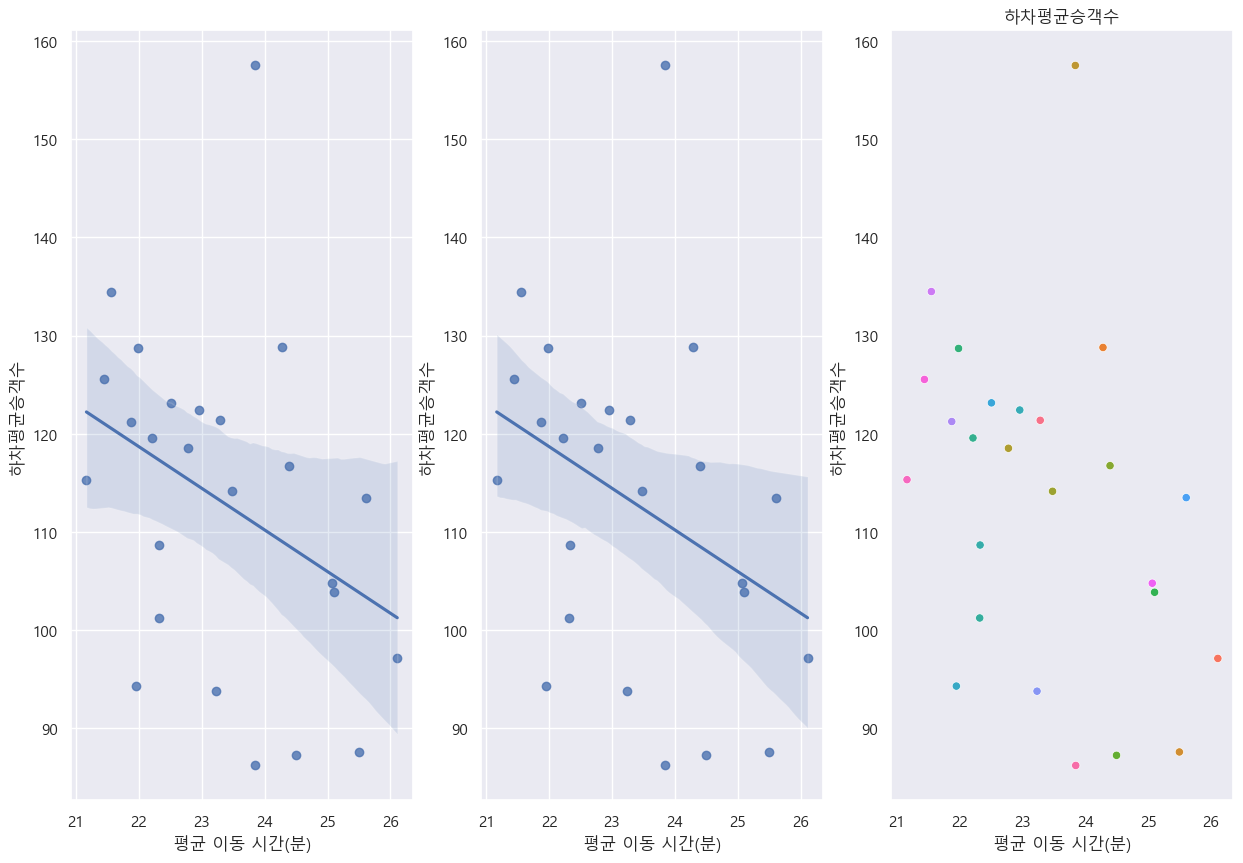

하차평균승객수 : PearsonRResult(statistic=-0.36049460362359953, pvalue=0.07668259838726062)


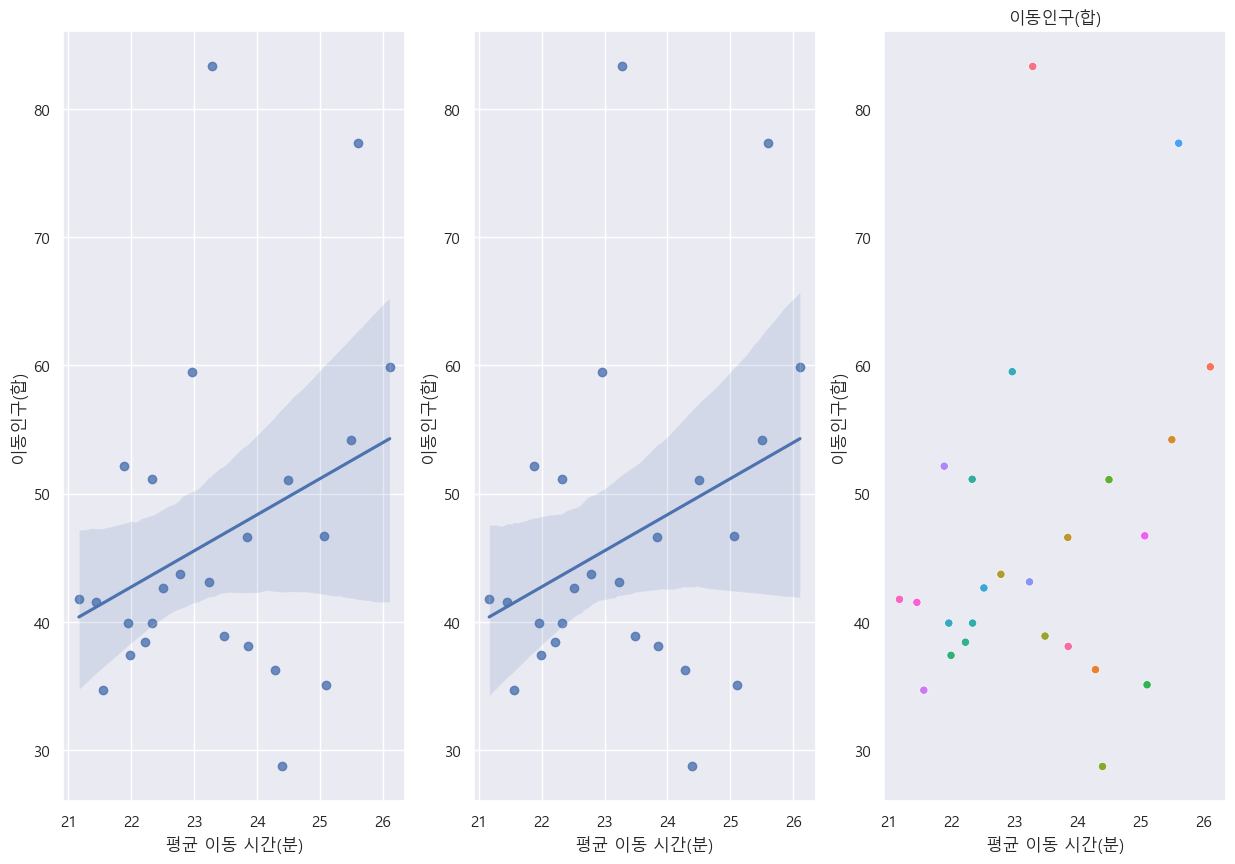

이동인구(합) : PearsonRResult(statistic=0.31544000540549627, pvalue=0.12454494936488411)


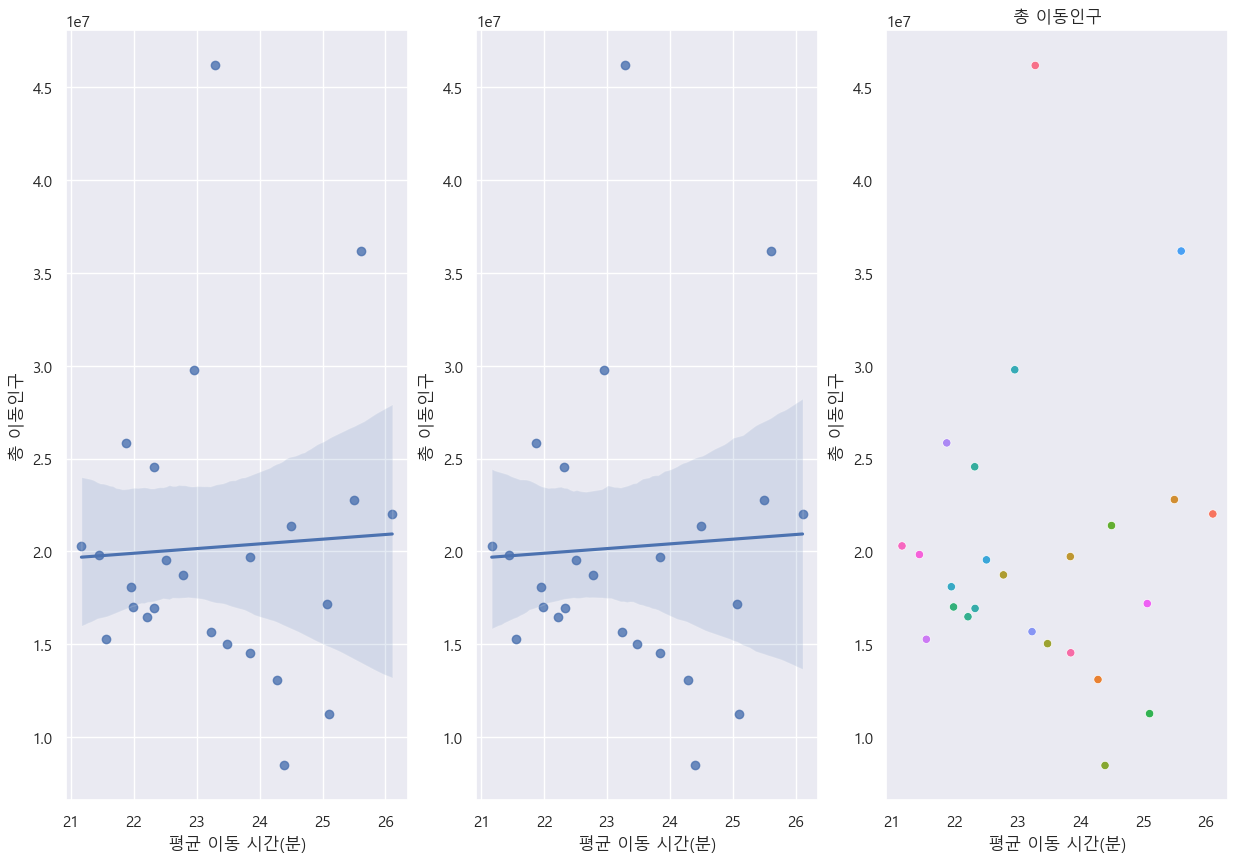

총 이동인구 : PearsonRResult(statistic=0.045696595345735225, pvalue=0.8282874998031786)


In [41]:
# 평균 이동 시간(분) 별 승하차
for i in use:
    plt.figure(figsize=(15,10))
    plt.subplot(1,3,1)
    sns.regplot(data=standard, x='평균 이동 시간(분)', y=i)
    plt.subplot(1,3,2)
    sns.regplot(data=standard, x='평균 이동 시간(분)', y=i)
    plt.subplot(1,3,3)
    sns.scatterplot(data=standard, x='평균 이동 시간(분)', y=i, hue=target, legend=False)
    plt.grid()
    plt.title(i)
    plt.show()

    result = spst.pearsonr(standard['평균 이동 시간(분)'], standard[i])
    print(f'{i} : {result}')

##### 가설2-1 평균 이동 시간(분) 별 이용자수
1. 승/하차총승객수와 관계에서는 상관계수 0.1 로 관계가 거의 없어 보임임
2. 승/하차평균승객수와 관계에서는 상관계수 0.3 정도의 약간의 관계가 있어 보임
3. 이동인구평균의 관계에서는 상관계수 0.3 정도의 약간의 관계가 있어 보임
4. 총이동인구의 관계에서는 상관계수 0.04로 관계가 없어 보임

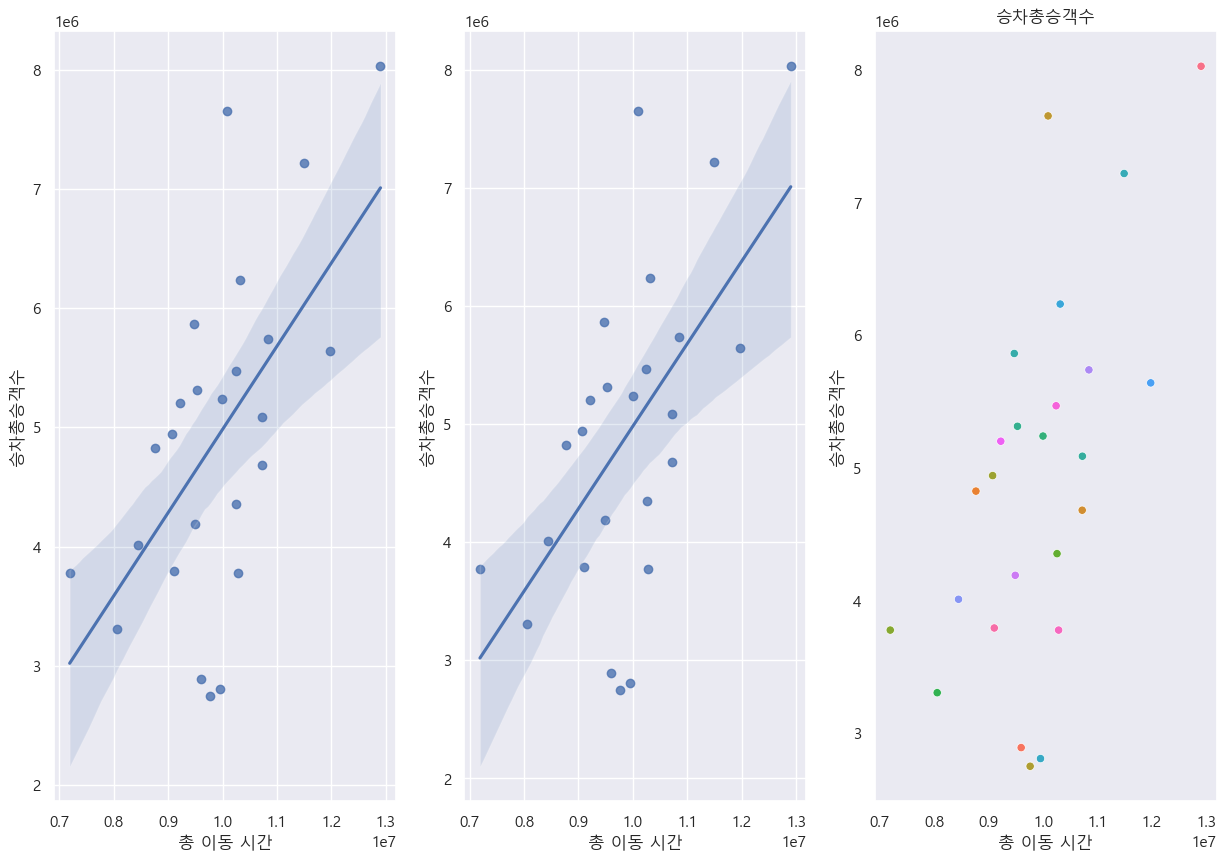

승차총승객수 : PearsonRResult(statistic=0.5955333451957727, pvalue=0.001684620372494398)


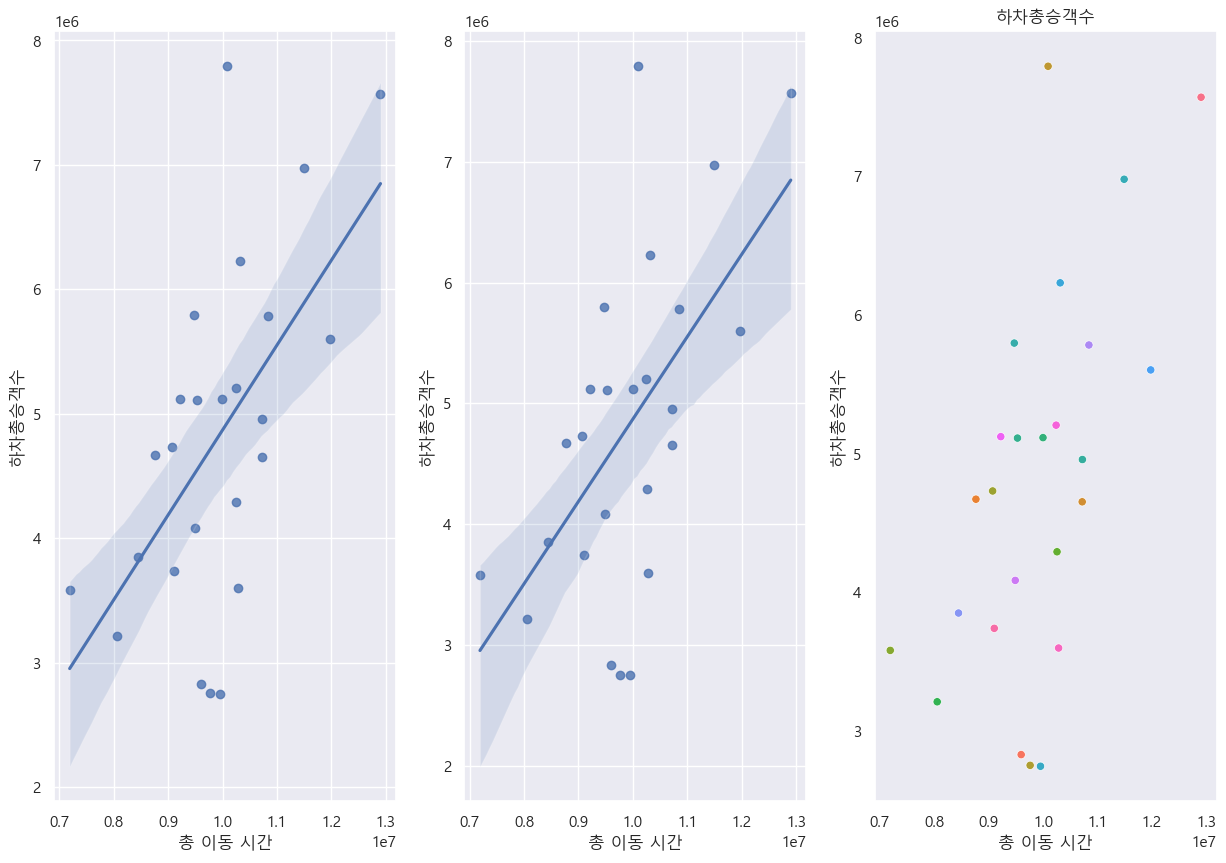

하차총승객수 : PearsonRResult(statistic=0.5901657349468873, pvalue=0.0019000395965845936)


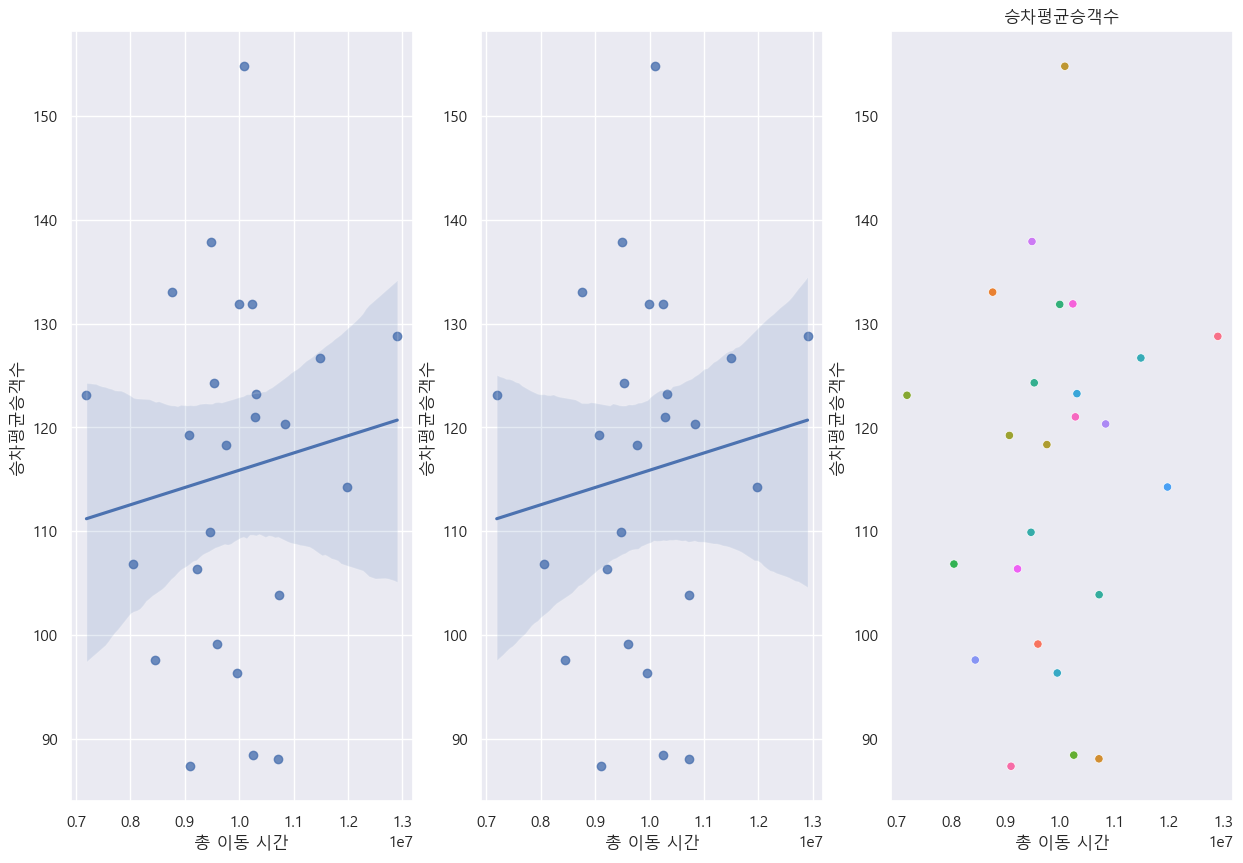

승차평균승객수 : PearsonRResult(statistic=0.11783974420329976, pvalue=0.5748012106288645)


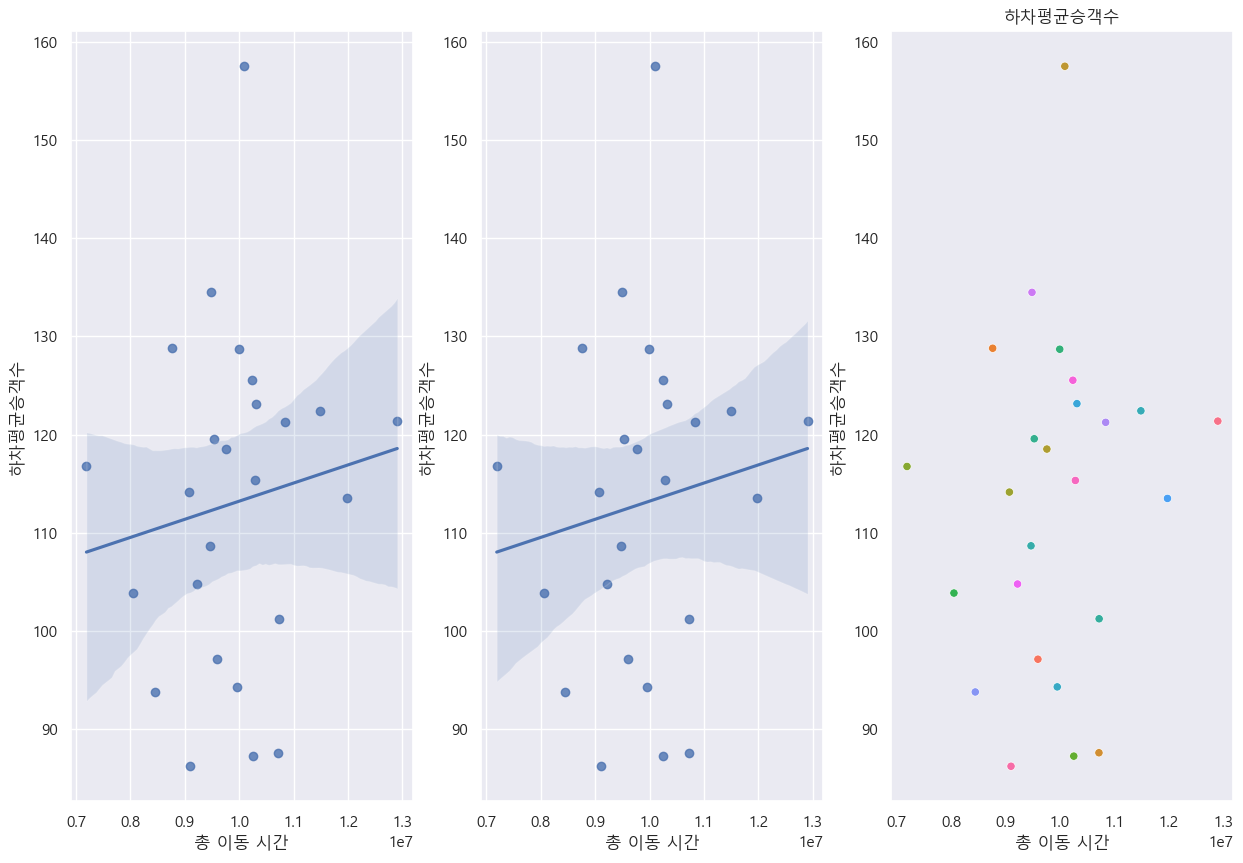

하차평균승객수 : PearsonRResult(statistic=0.13269097182267528, pvalue=0.5271947100597492)


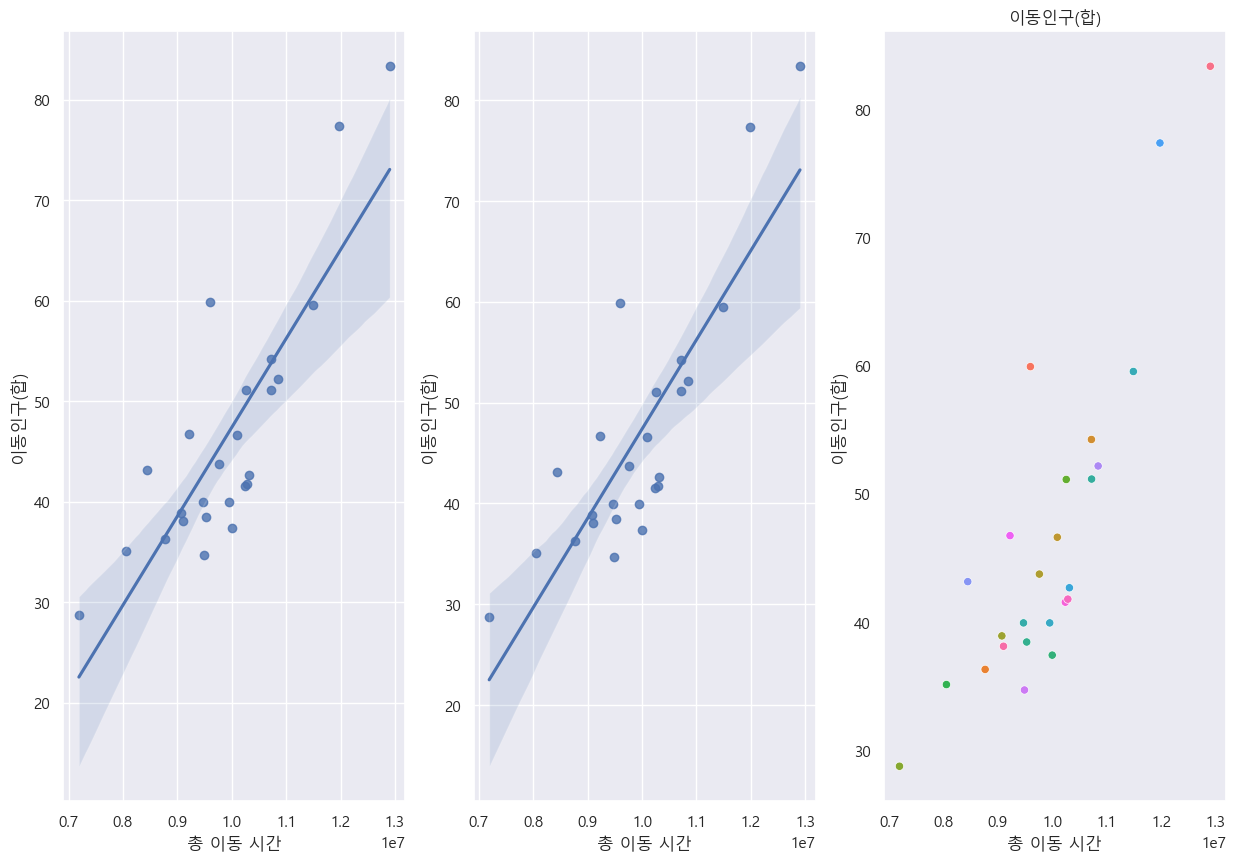

이동인구(합) : PearsonRResult(statistic=0.8380909585582496, pvalue=1.7092649680260089e-07)


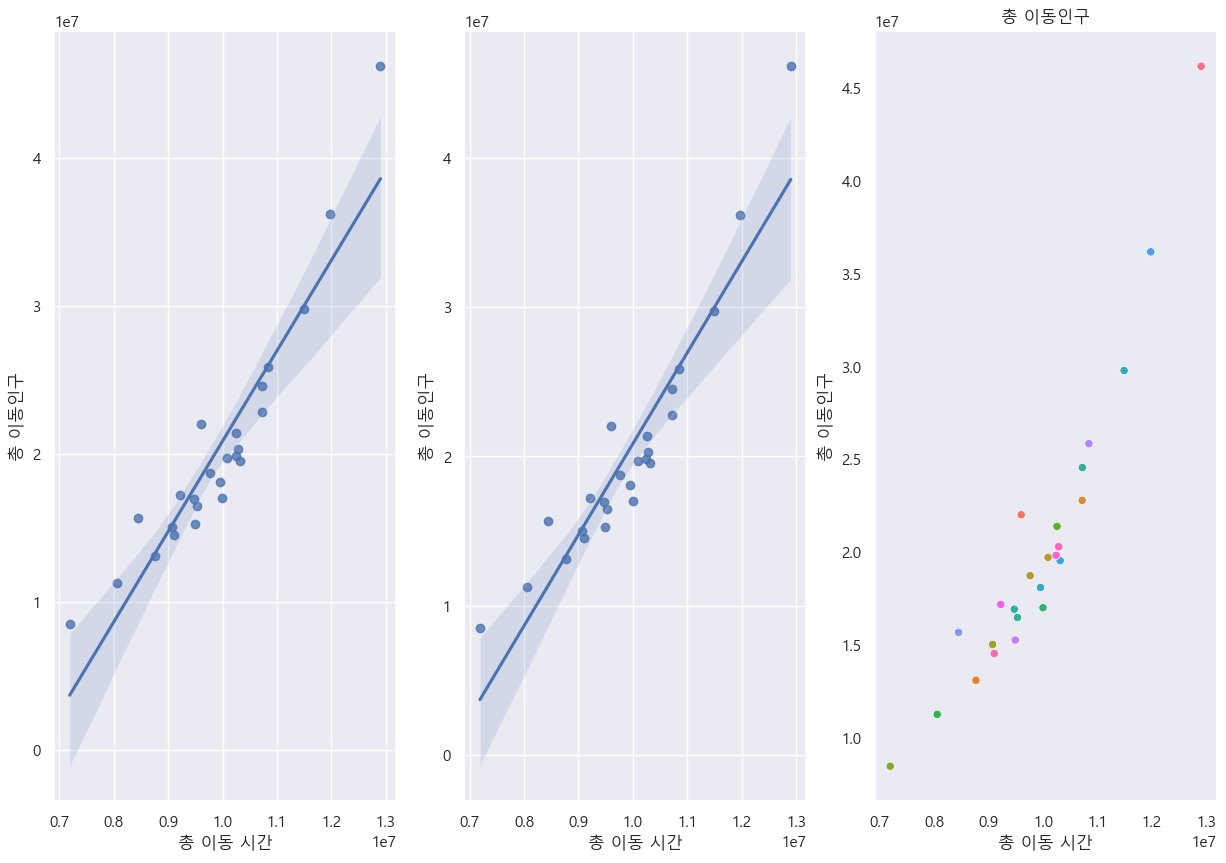

총 이동인구 : PearsonRResult(statistic=0.934049797227354, pvalue=9.095861793625874e-12)


In [42]:
# 총 이동 시간 별 승하차
for i in use:
    plt.figure(figsize=(15,10))
    plt.subplot(1,3,1)
    sns.regplot(data=standard, x='총 이동 시간', y=i)
    plt.subplot(1,3,2)
    sns.regplot(data=standard, x='총 이동 시간', y=i)
    plt.subplot(1,3,3)
    sns.scatterplot(data=standard, x='총 이동 시간', y=i, hue=target, legend=False)
    plt.grid()
    plt.title(i)
    plt.show()

    result = spst.pearsonr(standard['총 이동 시간'], standard[i])
    print(f'{i} : {result}')

##### 가설2-2 총 이동 시간 별 이용자수
1. 승/하차총승객수와 관계에서는 상관계수 0.5 이상의 큰 관계가 있어 보임
2. 승/하차평균승객수와 관계에서는 상관계수 0.11로 관계가 거의 없어 보임
3. 이동인구 평균과 총합의 관계에서 상관계사 0.8, 0.9 이상의 큰 관계가 있어 보임

In [43]:
# 자치구별 이동 시간(분당) 이용자수
standard['승차평균승객수/평균 이동 시간(분)'] = standard['승차평균승객수'] / standard['평균 이동 시간(분)']
standard['하차평균승객수/평균 이동 시간(분)'] = standard['하차평균승객수'] / standard['평균 이동 시간(분)']
standard['이동인구(합)/평균 이동 시간(분)'] = standard['이동인구(합)'] / standard['평균 이동 시간(분)']

standard['승차승객/총 이동 시간'] = standard['승차총승객수'] / standard['총 이동 시간']
standard['하차승객/총 이동 시간'] = standard['하차총승객수'] / standard['총 이동 시간']
standard['이동인구(합)/총 이동 시간'] = standard['이동인구(합)'] / standard['총 이동 시간']
standard['총 이동인구/총 이동 시간'] = standard['총 이동인구'] / standard['총 이동 시간']

standard[['승차평균승객수/평균 이동 시간(분)' , '하차평균승객수/평균 이동 시간(분)', '이동인구(합)/평균 이동 시간(분)'
        , '승차승객/총 이동 시간', '하차승객/총 이동 시간' , '이동인구(합)/총 이동 시간', '총 이동인구/총 이동 시간']].describe()

,승차평균승객수/평균 이동 시간(분),하차평균승객수/평균 이동 시간(분),이동인구(합)/평균 이동 시간(분),승차승객/총 이동 시간,하차승객/총 이동 시간,이동인구(합)/총 이동 시간,총 이동인구/총 이동 시간
count,25.000000,25.000000,25.000000,25.000000,25.000000,2.500000e+01,25.000000
mean,4.993413,4.876464,1.989346,0.493808,0.482498,4.643155e-06,1.989346
std,0.883769,0.863221,0.510339,0.115536,0.114877,7.891247e-07,0.510339
min,3.456074,3.435213,1.177749,0.281655,0.275993,3.654693e-06,1.177749
25%,4.256856,4.179981,1.700838,0.424455,0.418550,4.060204e-06,1.700838
50%,5.078090,4.866795,1.894758,0.524148,0.498165,4.358497e-06,1.894758
75%,5.530182,5.448504,2.126082,0.557696,0.536498,5.057356e-06,2.126082
max,6.490673,6.606532,3.577876,0.758623,0.772165,6.455894e-06,3.577876


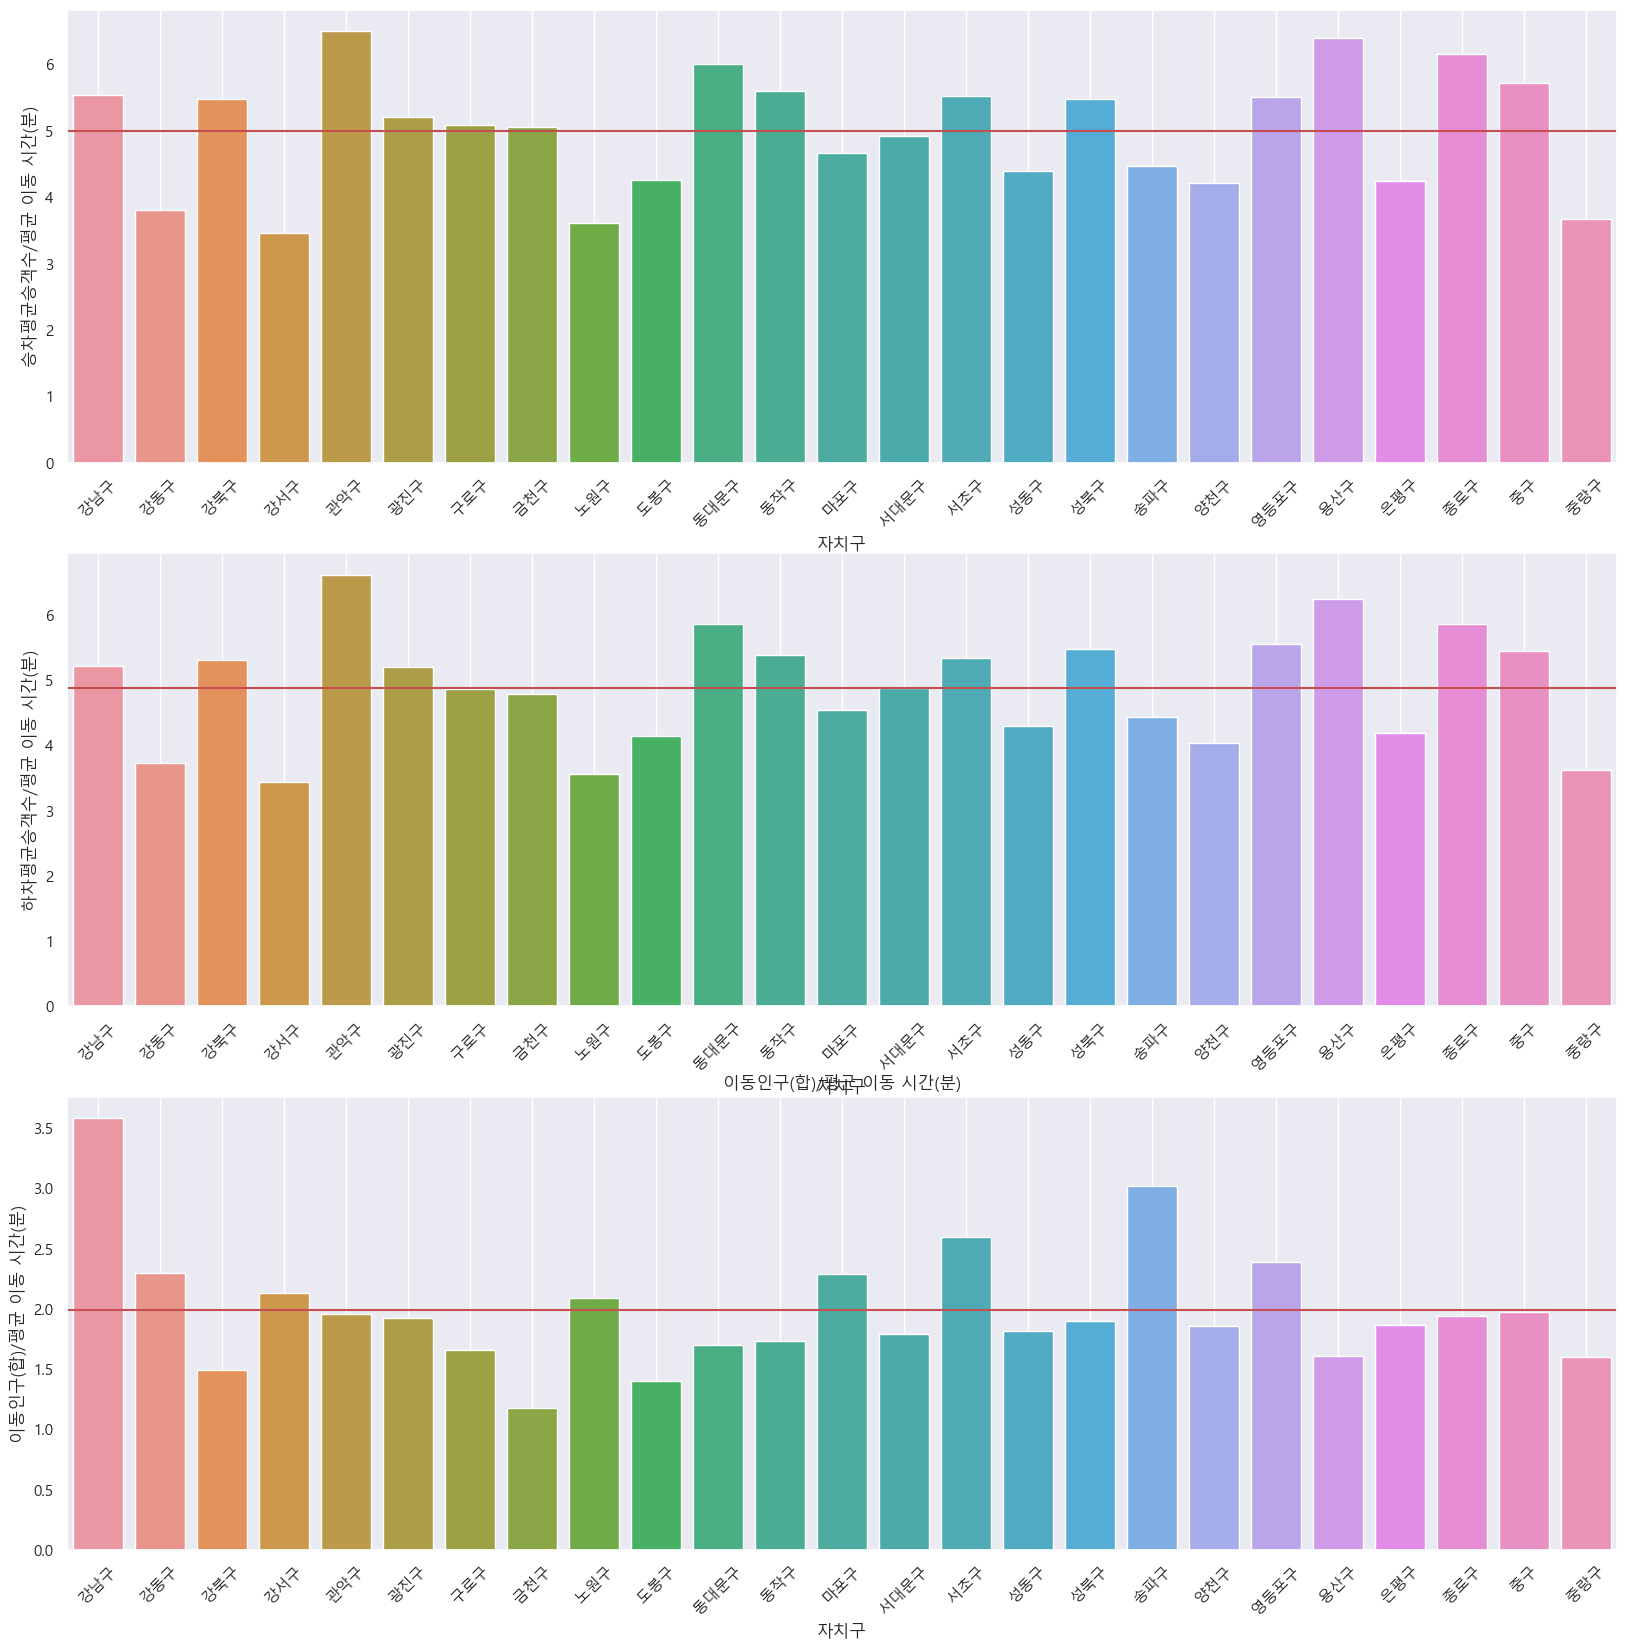

In [44]:
# 자치구별 평균 이동 시간 분당 이용자
li = ['승차평균승객수/평균 이동 시간(분)' , '하차평균승객수/평균 이동 시간(분)', '이동인구(합)/평균 이동 시간(분)']
count = 1
plt.figure(figsize=(20,20))
for i in li:
    plt.subplot(3,1,count)
    sns.barplot(data=standard, x=target, y = i)
    plt.axhline(standard[i].mean(), color='r')
    plt.xticks(rotation=45)
    plt.grid()
    count += 1
plt.title(i)
plt.show()

In [45]:
# ['승차평균승객수/평균 이동 시간(분)' , '하차평균승객수/평균 이동 시간(분)', '이동인구(합)/평균 이동 시간(분)']
tmp3 = standard.loc[(standard['승차평균승객수/평균 이동 시간(분)'] > standard['승차평균승객수/평균 이동 시간(분)'].mean())
                        & (standard['하차평균승객수/평균 이동 시간(분)'] > standard['하차평균승객수/평균 이동 시간(분)'].mean())
                        & (standard['이동인구(합)/평균 이동 시간(분)'] > standard['이동인구(합)/평균 이동 시간(분)'].mean())
                    ]
tmp3['자치구']

0      강남구
14     서초구
19    영등포구
Name: 자치구, dtype: object

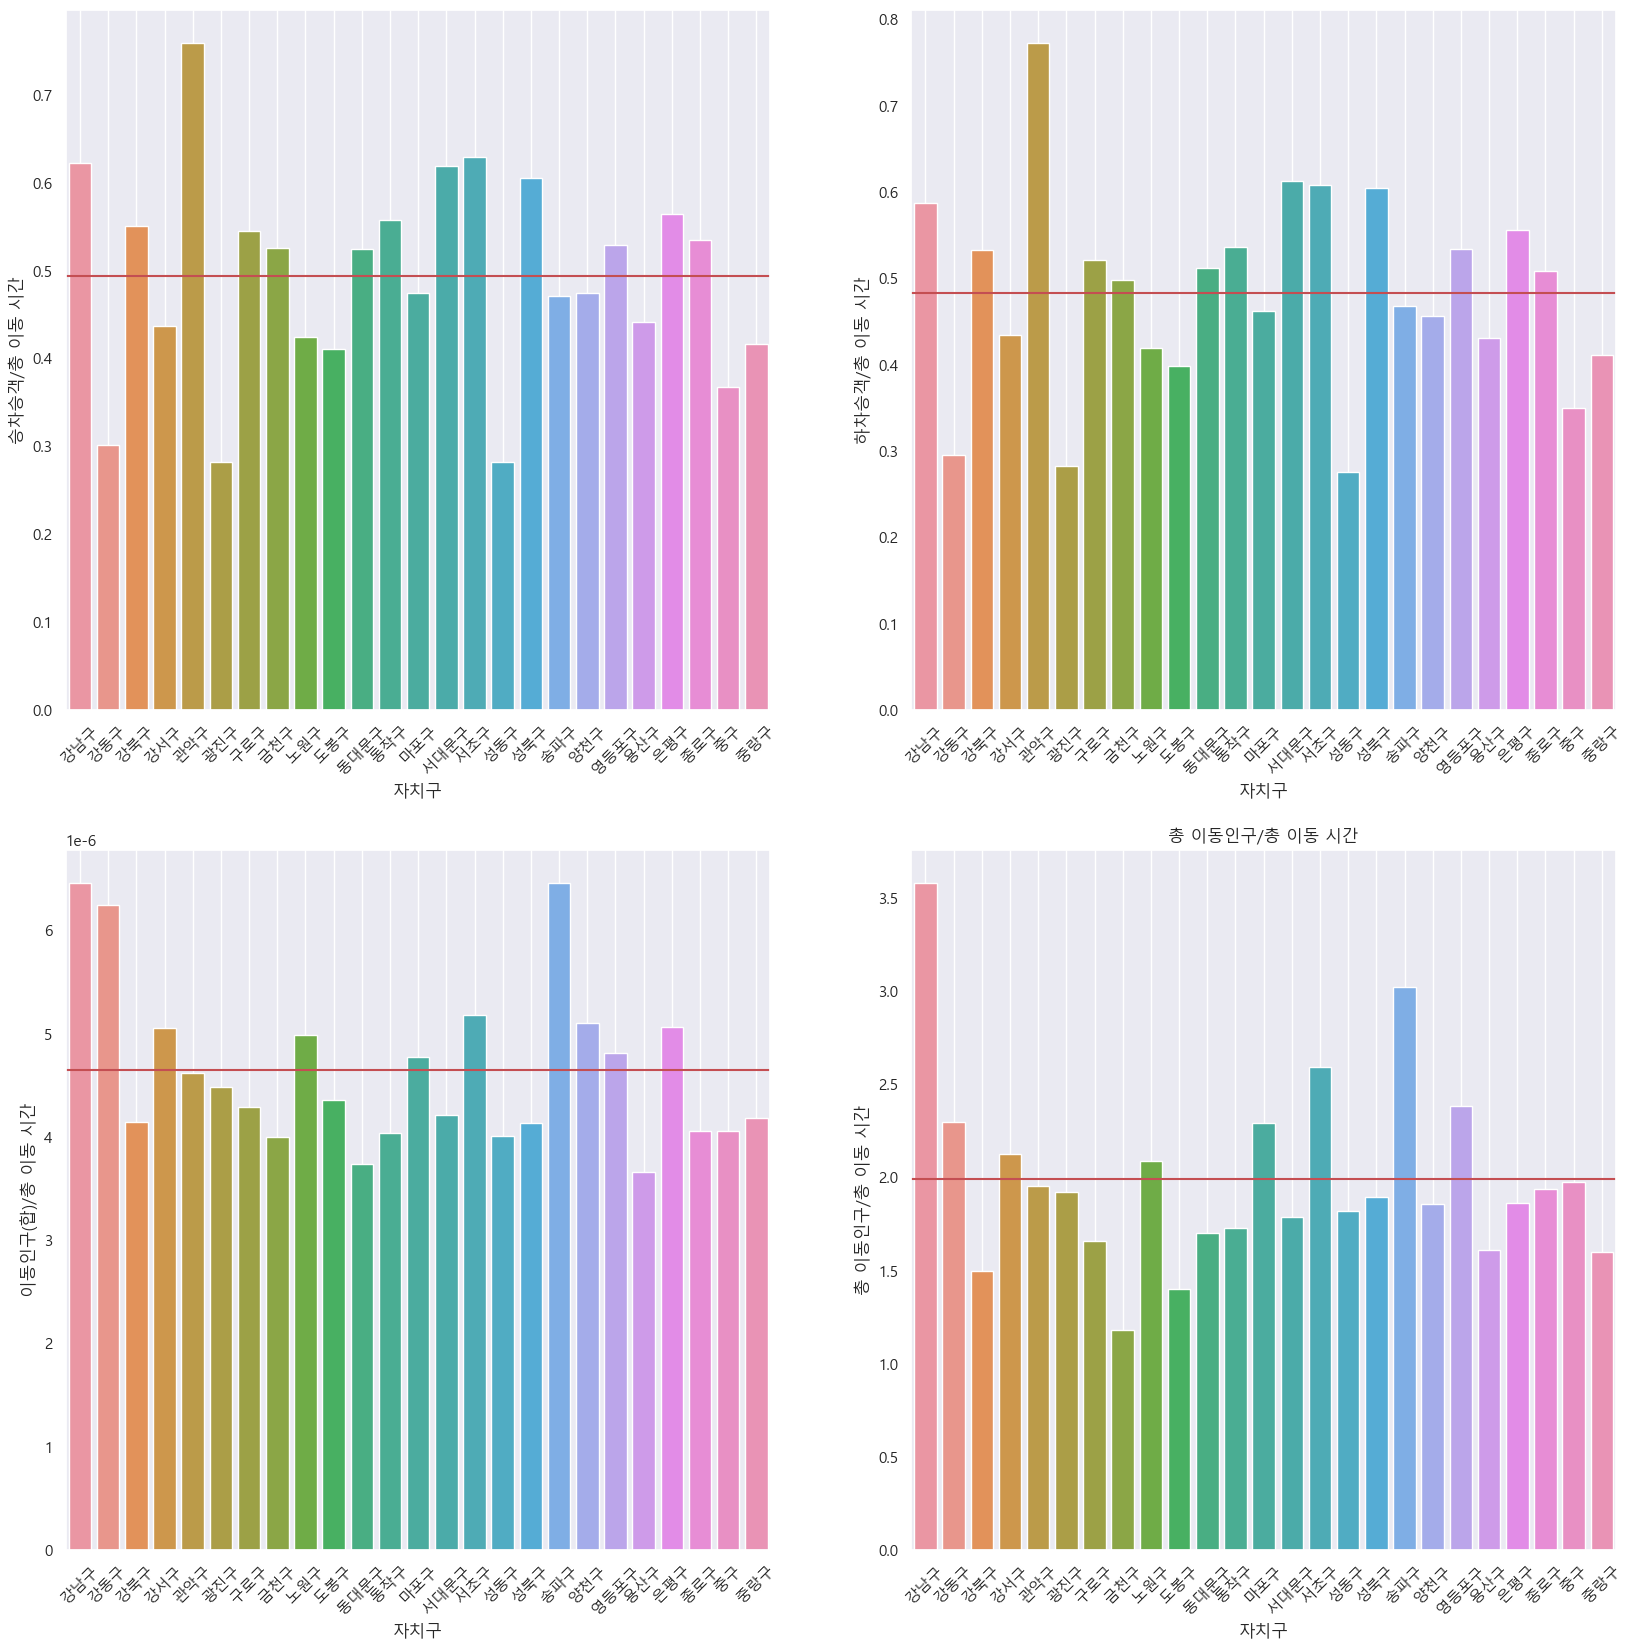

In [46]:
# 자치구별 총 이동 시간 분당 이용자
li = ['승차승객/총 이동 시간', '하차승객/총 이동 시간' , '이동인구(합)/총 이동 시간', '총 이동인구/총 이동 시간']
count = 1
plt.figure(figsize=(20,20))
for i in li:
    plt.subplot(2,2,count)
    sns.barplot(data=standard, x=target, y = i)
    plt.axhline(standard[i].mean(), color='r')
    plt.xticks(rotation=45)
    plt.grid()
    count += 1
plt.title(i)
plt.show()

In [47]:
# ['승차승객/총 이동 시간', '하차승객/총 이동 시간' , '이동인구(합)/총 이동 시간', '총 이동인구/총 이동 시간']
tmp4 = standard.loc[(standard['승차승객/총 이동 시간'] > standard['승차승객/총 이동 시간'].mean())
                        & (standard['하차승객/총 이동 시간'] > standard['하차승객/총 이동 시간'].mean())
                        & (standard['이동인구(합)/총 이동 시간'] > standard['이동인구(합)/총 이동 시간'].mean())
                        & (standard['총 이동인구/총 이동 시간'] > standard['총 이동인구/총 이동 시간'].mean())
                    ]
tmp4['자치구']

0      강남구
14     서초구
19    영등포구
Name: 자치구, dtype: object

In [48]:
# ['승차승객/총 이동 시간', '하차승객/총 이동 시간' , '이동인구(합)/총 이동 시간', '총 이동인구/총 이동 시간']
tmp4 = standard.loc[(standard['승차평균승객수/평균 이동 시간(분)'] > standard['승차평균승객수/평균 이동 시간(분)'].mean())
                        & (standard['하차평균승객수/평균 이동 시간(분)'] > standard['하차평균승객수/평균 이동 시간(분)'].mean())
                        & (standard['이동인구(합)/평균 이동 시간(분)'] > standard['이동인구(합)/평균 이동 시간(분)'].mean())
                        & (standard['승차승객/총 이동 시간'] > standard['승차승객/총 이동 시간'].mean())
                        & (standard['하차승객/총 이동 시간'] > standard['하차승객/총 이동 시간'].mean())
                        & (standard['이동인구(합)/총 이동 시간'] > standard['이동인구(합)/총 이동 시간'].mean())
                        & (standard['총 이동인구/총 이동 시간'] > standard['총 이동인구/총 이동 시간'].mean())
                    ]
tmp4['자치구']

0      강남구
14     서초구
19    영등포구
Name: 자치구, dtype: object

### 가설 2 : 이동시간 대비 이용자
<p>강남구/서초구/영등포구</p>
<p>평균 이동시간과 총 이동시간 대비 승/하차객과 이동인구의 상관관계에서 중간 이상의 지표를 가지고</p>
<p>지역구별 분 당 이용자가 높은 지역을 구함</p>

In [49]:
o_move

,출발,도착,총 이동인구,총 이동 시간,이동인구(합),평균 이동 시간(분),빈도,총이동인구/빈도,총이동시간/빈도
0,강남구,강동구,887641.96,616490,35.747330,24.827433,24831,35.747330,24.827433
1,강남구,강북구,255581.36,489030,16.423426,31.424624,15562,16.423426,31.424624
2,강남구,강서구,468843.27,581830,24.571211,30.492637,19081,24.571211,30.492637
3,강남구,관악구,1153663.97,608100,46.157637,24.329839,24994,46.157637,24.329839
4,강남구,광진구,1191309.71,563230,43.652109,20.637939,27291,43.652109,20.637939
...,...,...,...,...,...,...,...,...,...
595,중랑구,영등포구,99061.10,294790,11.121713,33.096441,8907,11.121713,33.096441
596,중랑구,용산구,109326.21,286250,10.997506,28.794890,9941,10.997506,28.794890
597,중랑구,은평구,45210.57,228080,6.384772,32.210140,7081,6.384772,32.210140
598,중랑구,종로구,258428.59,350540,18.717215,25.388571,13807,18.717215,25.388571


In [50]:
o_move.sort_values(by='빈도', ascending=False)

,출발,도착,총 이동인구,총 이동 시간,이동인구(합),평균 이동 시간(분),빈도,총이동인구/빈도,총이동시간/빈도
435,양천구,강서구,2480691.41,619350,64.077373,15.998089,38714,64.077373,15.998089
13,강남구,서초구,4814578.33,608310,124.404494,15.718198,38701,124.404494,15.718198
336,서초구,강남구,4802309.66,594630,124.473437,15.412509,38581,124.473437,15.412509
89,강서구,양천구,2472391.56,611900,64.445615,15.949849,38364,64.445615,15.949849
409,송파구,강동구,2647876.11,679810,73.625740,18.902514,35964,73.625740,18.902514
...,...,...,...,...,...,...,...,...,...
441,양천구,도봉구,17740.78,123960,5.335573,37.281203,3325,5.335573,37.281203
233,도봉구,양천구,17229.90,119720,5.280386,36.690162,3263,5.280386,36.690162
54,강북구,금천구,23665.37,122200,7.281652,37.600000,3250,7.281652,37.600000
176,금천구,도봉구,17780.73,122270,5.872104,40.379789,3028,5.872104,40.379789


In [51]:
# 지역구 간의 이동 빈도 대비 이동인구/시간
o_move['총이동인구/빈도'] = o_move['총 이동인구'] / o_move['빈도']
o_move['총이동시간/빈도'] = o_move['총 이동 시간'] / o_move['빈도']

In [52]:
o_move.sort_values(by=['총이동인구/빈도', '총이동시간/빈도'], ascending=False).head(30)

,출발,도착,총 이동인구,총 이동 시간,이동인구(합),평균 이동 시간(분),빈도,총이동인구/빈도,총이동시간/빈도
336,서초구,강남구,4802309.66,594630,124.473437,15.412509,38581,124.473437,15.412509
13,강남구,서초구,4814578.33,608310,124.404494,15.718198,38701,124.404494,15.718198
408,송파구,강남구,3314641.58,654700,93.673635,18.502190,35385,93.673635,18.502190
16,강남구,송파구,3326366.66,676720,93.269590,18.974877,35664,93.269590,18.974877
40,강동구,송파구,2640613.78,658870,73.830280,18.421685,35766,73.830280,18.421685
409,송파구,강동구,2647876.11,679810,73.625740,18.902514,35964,73.625740,18.902514
324,서대문구,마포구,2374696.77,557610,67.751691,15.908987,35050,67.751691,15.908987
300,마포구,서대문구,2392763.39,560880,67.339189,15.784763,35533,67.339189,15.784763
89,강서구,양천구,2472391.56,611900,64.445615,15.949849,38364,64.445615,15.949849
435,양천구,강서구,2480691.41,619350,64.077373,15.998089,38714,64.077373,15.998089


In [53]:
tmp = o_move.loc[o_move['출발'] != o_move['도착']]
tmp.sort_values(by=['총이동인구/빈도', '총이동시간/빈도'], ascending=False).head(20)

,출발,도착,총 이동인구,총 이동 시간,이동인구(합),평균 이동 시간(분),빈도,총이동인구/빈도,총이동시간/빈도
336,서초구,강남구,4802309.66,594630,124.473437,15.412509,38581,124.473437,15.412509
13,강남구,서초구,4814578.33,608310,124.404494,15.718198,38701,124.404494,15.718198
408,송파구,강남구,3314641.58,654700,93.673635,18.502190,35385,93.673635,18.502190
16,강남구,송파구,3326366.66,676720,93.269590,18.974877,35664,93.269590,18.974877
40,강동구,송파구,2640613.78,658870,73.830280,18.421685,35766,73.830280,18.421685
409,송파구,강동구,2647876.11,679810,73.625740,18.902514,35964,73.625740,18.902514
324,서대문구,마포구,2374696.77,557610,67.751691,15.908987,35050,67.751691,15.908987
300,마포구,서대문구,2392763.39,560880,67.339189,15.784763,35533,67.339189,15.784763
89,강서구,양천구,2472391.56,611900,64.445615,15.949849,38364,64.445615,15.949849
435,양천구,강서구,2480691.41,619350,64.077373,15.998089,38714,64.077373,15.998089


In [54]:
tmp = pd.crosstab(o_move['출발'], o_move['도착'], normalize='all')
tmp

도착,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
출발,,,,,,,,,,,,,,,,,,,,,
강남구,0.000000,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,...,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667
강동구,0.001667,0.000000,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,...,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667
강북구,0.001667,0.001667,0.000000,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,...,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667
강서구,0.001667,0.001667,0.001667,0.000000,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,...,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667
관악구,0.001667,0.001667,0.001667,0.001667,0.000000,0.001667,0.001667,0.001667,0.001667,0.001667,...,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667
광진구,0.001667,0.001667,0.001667,0.001667,0.001667,0.000000,0.001667,0.001667,0.001667,0.001667,...,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667
구로구,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.000000,0.001667,0.001667,0.001667,...,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667
금천구,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.000000,0.001667,0.001667,...,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667
노원구,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.000000,0.001667,...,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667


### 가설 3 : 지역간의 이동빈도
<p>강남구/송파구/서초구</p>
<p>같은 지역구 내에서의 이동인구와 이동시간 대비 빈도 비교 ( 상위 5 지역 : 강남구 / 송파구 / 강동구 / 서초구 / 강서구)</p>
<p>다른 지역구 간의 이동인구와 이동시간 대비 빈도 비교  ( 상위 3 지역 : 서초->강남 / 강남->서초 / 송파->강남)</p>


## 문제 : 버스 노선 추가 필요 대상 지역(구 단위) 선정

3가지 가설의 공통 지역구인 강남구